# Practise Project 2

# 1. Titanic Dataset

In [410]:
#importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import warnings
warnings.filterwarnings('ignore')

In [411]:
df=pd.read_csv('titanics.csv')
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [412]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [413]:
df.shape

(891, 12)

The dataset contains the 891 rows and 12 columns

In [414]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Out of 12 columns Name,sex,Cabin and Embarked is object type data and Age is in float type while rest other integer data type

In [415]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

These are columns which are present in the dataset

In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [417]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

The total counts of survived people

<Axes: xlabel='Embarked', ylabel='Survived'>

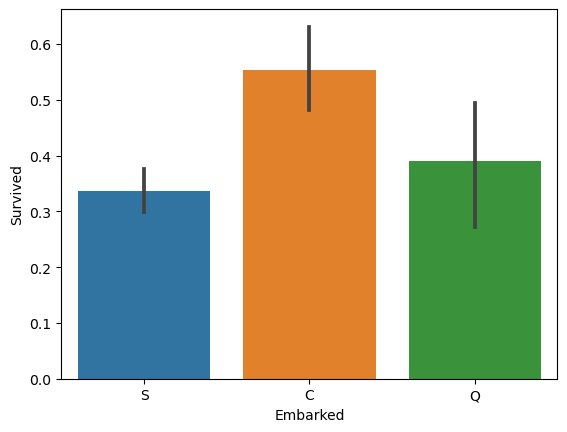

In [418]:
sns.barplot(data=df,x='Embarked',y='Survived')

<Axes: xlabel='Embarked', ylabel='count'>

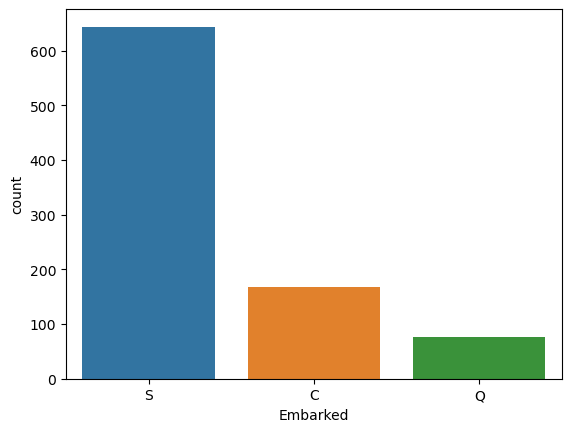

In [419]:
sns.countplot(x='Embarked',data=df)

From the above plot we can observed that the-

1. The S has the highest number in the Embarked Category while Q is the lowest Embarked category

2. And the people who survived has the highest number from 'C' category of Embarked

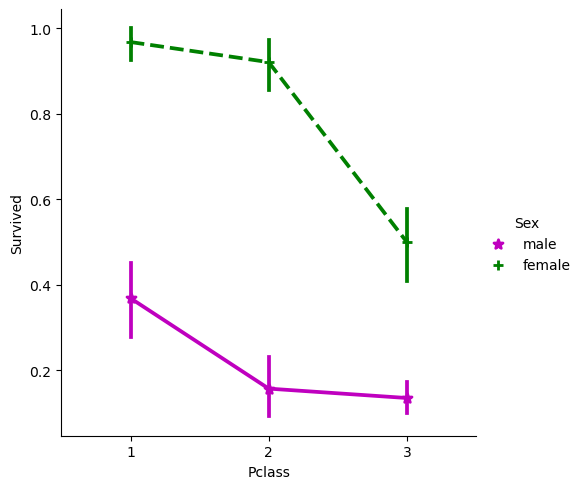

In [420]:
sns.catplot(data=df,x='Pclass',y='Survived',hue='Sex',palette={'male':'m','female':'g'},markers=['*','+'],linestyles=["-","--"],kind="point")

Text(0.5, 1.0, 'Distribution of Survival')

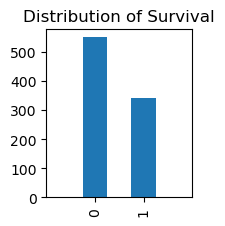

In [421]:
ax1=plt.subplot2grid((2,3),(0,0))
df.Survived.value_counts().plot(kind='bar')
ax1.set_xlim(-1,2)
plt.title('Distribution of Survival')

Text(0.5, 1.0, 'Survival by Age')

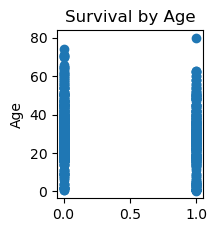

In [422]:
plt.subplot2grid((2,3),(1,0))
plt.scatter(df.Survived,df.Age)
plt.ylabel('Age')
plt.title('Survival by Age')

Text(0.5, 1.0, 'Passenger per boarding location')

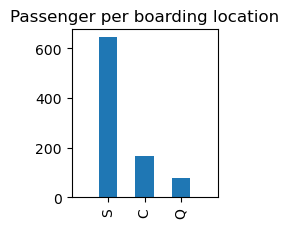

In [423]:
ax3=plt.subplot2grid((2,3),(1,0))
df.Embarked.value_counts().plot(kind='bar')
ax3.set_xlim(-1,len(df.Embarked.value_counts()))
plt.title("Passenger per boarding location")

Text(0.5, 1.0, 'Class Distribution')

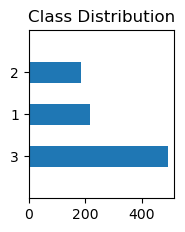

In [424]:
ax2=plt.subplot2grid((2,3),(1,0))
df.Pclass.value_counts().plot(kind='barh')
ax2.set_ylim(-1,len(df.Pclass.value_counts()))
plt.title('Class Distribution')


Very high number of passenger are from 3rd class as compared to 1st and 2nd class

In [425]:
plt.subplot2grid((2,3),(1,0))
df.Age[df.Pclass==1].plot(kind='kde')
df.Age[df.Pclass==2].plot(kind='kde')
df.Age[df.Pclass==3].plot(kind='kde')

plt.xlabel("Age")
plt.title("Age Distribution within classes")
plt.legend(('1st class','2nd class','3rd class'),loc='best')

In [426]:
fig=plt.figure(figsize=(18,6))

df_male=df.Survived[df.Sex=='male'].value_counts().sort_index()
df_female=df.Survived[df.Sex=='female'].value_counts().sort_index()

ax1=fig.add_subplot(121)
df_male.plot(kind='barh',label='Male')
df_female.plot(kind='barh',label='Female',color='#C20078')
plt.title("Who survived with respect to gender");plt.legend(loc='best')
ax1.set_ylim(-1,2)

ax4=fig.add_subplot(122)
(df_male/float(df_male.sum())).plot(kind='barh',label='Male')
(df_female/float(df_female.sum())).plot(kind='barh',color='#C20078',label='Female')
plt.title("Who survived proportionally with respect to gender");plt.legend(loc='best')

ax4.set_ylim(-1,2)

(-1.0, 2.0)

from the first grpah we can conclude that the count of female survival is more compared to female while proportionally female survival chance is more than the male

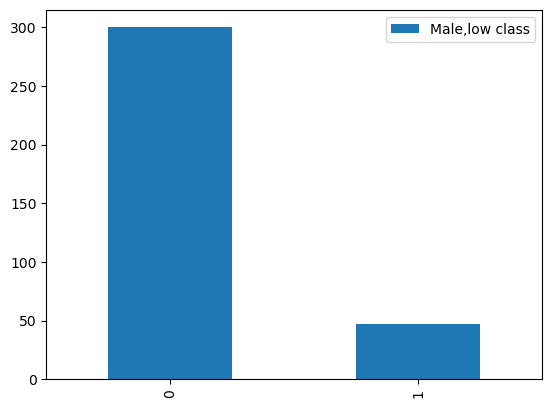

In [427]:
ax23=fig.add_subplot(143)
plt1=df.Survived[df.Sex=='male'][df.Pclass==3].value_counts()
plt1.plot(kind='bar',label='Male,low class')
ax23.set_xticklabels(['Died','Survived'])
ax23.set_xlim(-1,len(plt1))
plt.legend(loc='best')

Male from low class has died more while very less survived from low class

In [428]:
ax33=fig.add_subplot(143)
plt2=df.Survived[df.Sex=='male'][df.Pclass!=3].value_counts()
plt2.plot(kind='bar',label='Male high class')
ax33.set_xticklabels(['Died','Survived'])
ax33.set_xlim(-1,len(plt2))
plt.legend(loc='best')

Malre from high class have more chances of survival comapred to low class

In [429]:
df.isnull()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

In [430]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

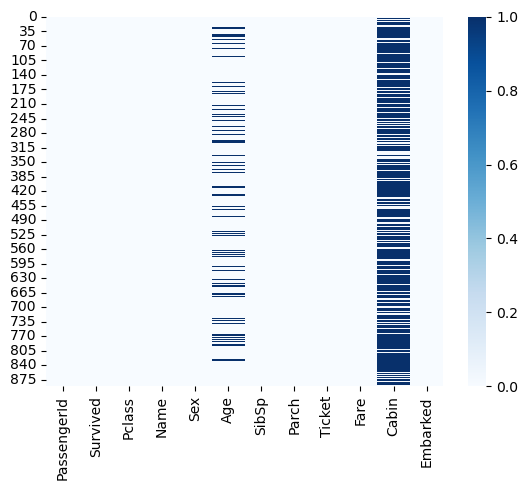

In [431]:
sns.heatmap(df.isnull(),cmap='Blues')

There are 177 missing values from Age and 687 from cabin. So we are replacing the null value with mean

In [432]:
mean=df['Age'].mean()

In [433]:
df['Age'].fillna(value=mean,inplace=True)

In [434]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Still Embarked has 2 missing values in it we are replacing the missing values by mode

In [435]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [436]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [437]:
df.drop('Cabin',axis=1,inplace=True)

Dropping the Cabin column since it does not making sense 

<Axes: >

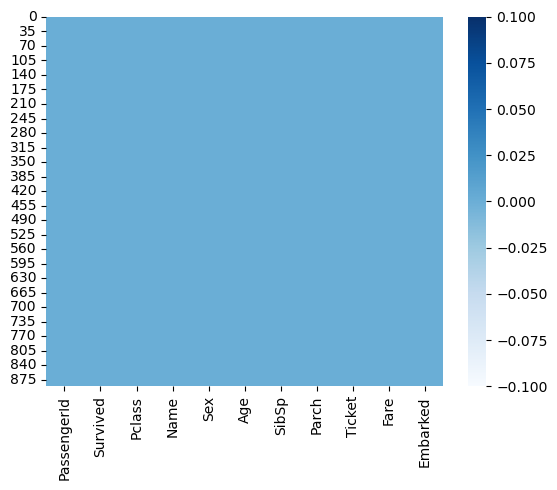

In [438]:
sns.heatmap(df.isnull(),cmap='Blues')

In [439]:
dfcorr=df.corr()
dfcorr

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.033207 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.069809 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.331339  0.083081  0.018443   
Age             0.033207 -0.069809 -0.331339  1.000000 -0.232625 -0.179191   
SibSp          -0.057527 -0.035322  0.083081 -0.232625  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.179191  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.091566  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.091566  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

In [440]:
plt.figure(figsize=(20,10))
sns.heatmap(dfcorr,cmap='Blues',annot=True)

<Axes: >

From the heatmap we observed some points:

1.SibSP and Prach has positive correlation with each other


2. Parch and Fare has the negative correlation with each other


3. Pclass impact negative relation

In [441]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   13.002015    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.699118    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

From the statistical Summary we can conclude some points:

1. The dataset has right side skewness sinch mean is greater than median

2. There is sudden increase in the values between 75% quantile and max value which indicates the presence of outliers

3. Passengerid,Age and Fare have outliers since we can't confirm this for outliers we can take help of boxplot

In [442]:
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(10,10))

PassengerId       Axes(0.125,0.712609;0.133621x0.167391)
Survived       Axes(0.285345,0.712609;0.133621x0.167391)
Pclass          Axes(0.44569,0.712609;0.133621x0.167391)
Age            Axes(0.606034,0.712609;0.133621x0.167391)
SibSp          Axes(0.766379,0.712609;0.133621x0.167391)
Parch             Axes(0.125,0.511739;0.133621x0.167391)
Fare           Axes(0.285345,0.511739;0.133621x0.167391)
dtype: object

From the boxplot we can see that the Age,SibSp,Parch and Fare has the outliers in it we can remove the outliers by using zscore

<Axes: xlabel='Parch', ylabel='Density'>

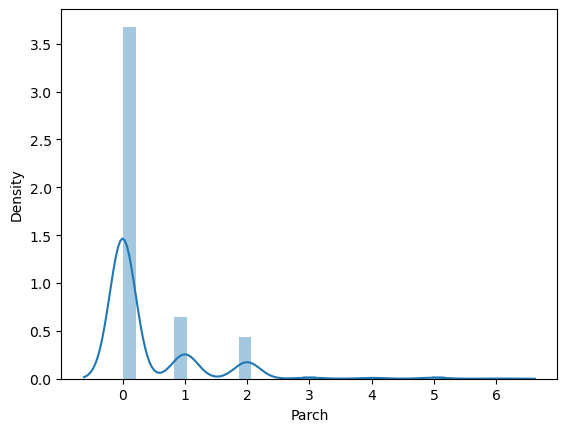

In [443]:
sns.distplot(df['Parch'])

It shows the righ side skewness

In [444]:
sns.distplot(df['Fare'])

<Axes: xlabel='Fare', ylabel='Density'>

<Axes: xlabel='Age', ylabel='Density'>

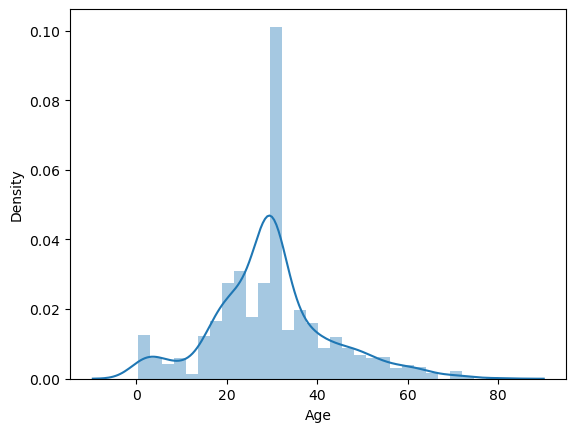

In [445]:
sns.distplot(df['Age'])

<Axes: xlabel='Pclass', ylabel='Density'>

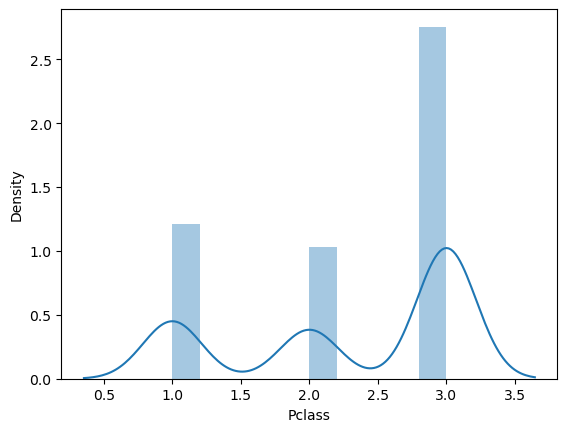

In [446]:
sns.distplot(df['Pclass'])

<Axes: xlabel='Survived', ylabel='Density'>

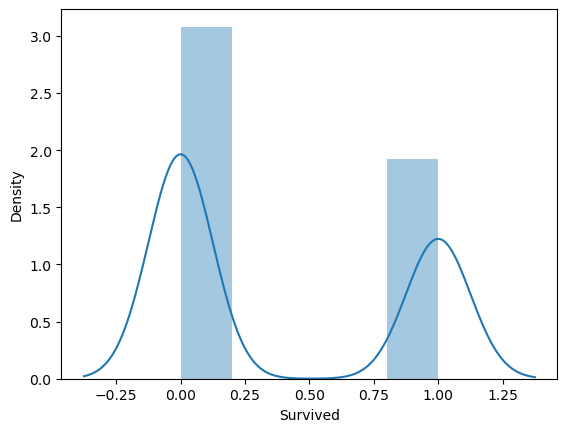

In [447]:
sns.distplot(df['Survived'])

<Axes: xlabel='PassengerId', ylabel='Density'>

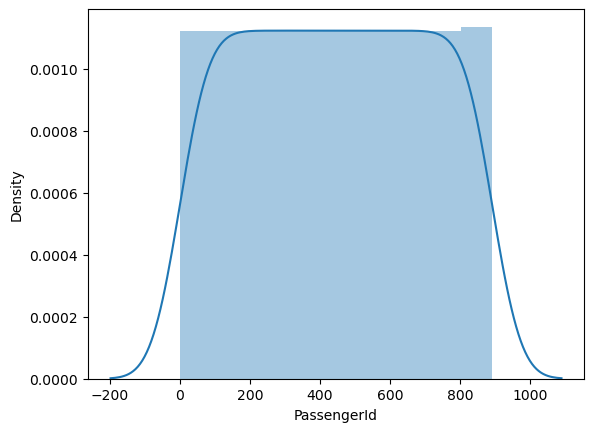

In [448]:
sns.distplot(df['PassengerId'])

From the distribution plots we can see they have right hand side skewness

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

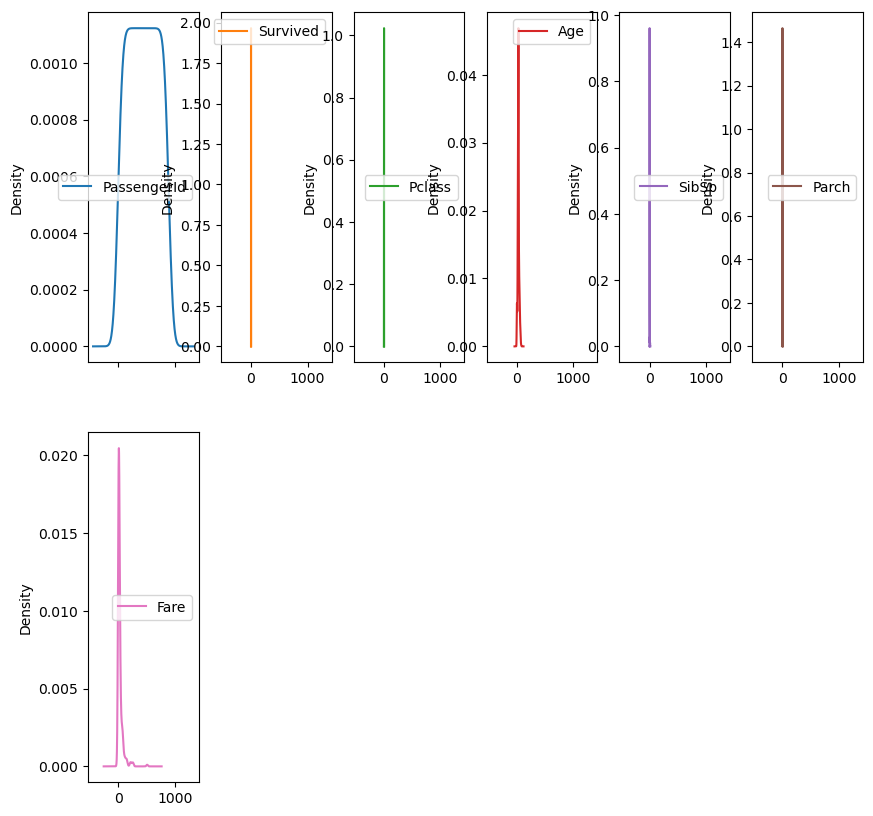

In [449]:
df.plot(kind='kde',subplots=True,layout=(2,6),figsize=(10,10))

In [450]:
df.drop('Ticket',axis=1,inplace=True)

In [451]:
plt.scatter(data=df,x='Age',y='Fare')

<Axes: xlabel='Survived', ylabel='Age'>

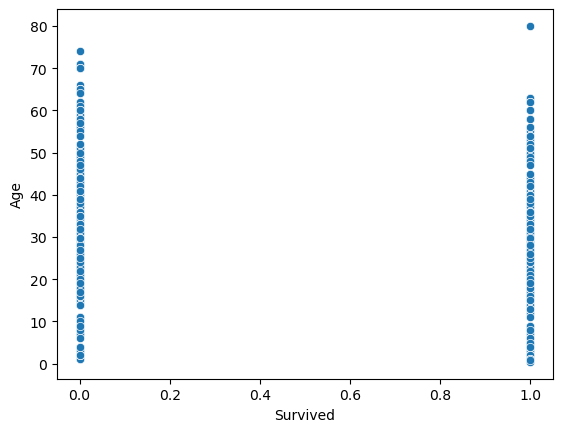

In [452]:
sns.scatterplot(data=df,x='Survived',y='Age')

In [453]:
df['Age'].value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64

In [454]:
sns.pairplot(df)

In [455]:
sns.regplot(x="Fare",y='Age',data=df)

<Axes: xlabel='Fare', ylabel='Age'>

<Axes: xlabel='Age', ylabel='Fare'>

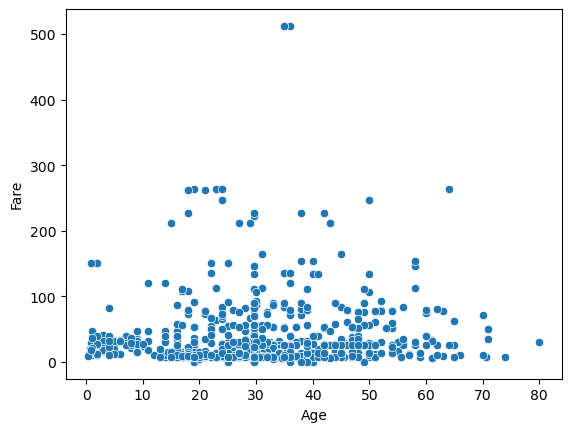

In [456]:
sns.scatterplot(x='Age',y='Fare',data=df)

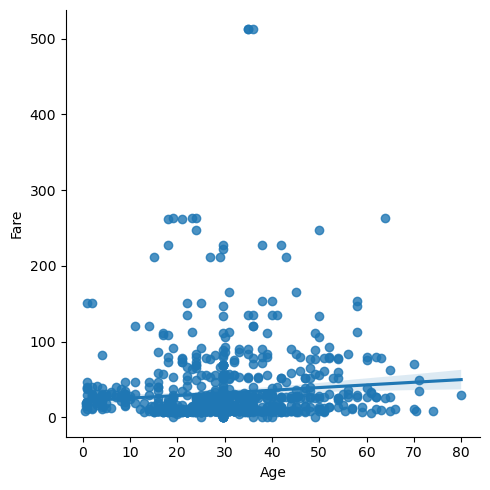

In [457]:
sns.lmplot(x='Age',y='Fare',data=df)

In [458]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [459]:
lencode=LabelEncoder()
df['Sex']=lencode.fit_transform(df['Sex'])
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex        Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.000000      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.000000      1   
2                               Heikkinen, Miss. Laina    0  26.000000      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.000000      1   
4                             Allen, Mr. William Henry    1  35.000000      0   
..                                                 ...  ...        ...    ...   
886                              Montvila, Rev. Juozas    1  27.000000      0   
887                       Graham, Miss. Margaret Edith    0  19.000000      0   
888           Johnston, Miss. Catherine Helen "Carrie"    0  29.699118      1   
889                              Behr, Mr. Karl Howell    1  26.000000      0   
890                                Dooley, Mr. Patrick    1  32.000000      0   

     Parch     Fare Embarked  
0        0   7.2500        S  
1        0  71.2833        C  
2        0   7.9250        S  
3        0  53.1000        S  
4        0   8.0500        S  
..     ...      ...      ...  
886      0  13.0000        S  
887      0  30.0000        S  
888      2  23.4500        S  
889      0  30.0000        C  
890      0   7.7500        Q  

[891 rows x 10 columns]

In [460]:
lencode=LabelEncoder()
df['Name']=lencode.fit_transform(df['Name'])
df

PassengerId  Survived  Pclass  Name  Sex        Age  SibSp  Parch  \
0              1         0       3   108    1  22.000000      1      0   
1              2         1       1   190    0  38.000000      1      0   
2              3         1       3   353    0  26.000000      0      0   
3              4         1       1   272    0  35.000000      1      0   
4              5         0       3    15    1  35.000000      0      0   
..           ...       ...     ...   ...  ...        ...    ...    ...   
886          887         0       2   548    1  27.000000      0      0   
887          888         1       1   303    0  19.000000      0      0   
888          889         0       3   413    0  29.699118      1      2   
889          890         1       1    81    1  26.000000      0      0   
890          891         0       3   220    1  32.000000      0      0   

        Fare Embarked  
0     7.2500        S  
1    71.2833        C  
2     7.9250        S  
3    53.1000        S  
4     8.0500        S  
..       ...      ...  
886  13.0000        S  
887  30.0000        S  
888  23.4500        S  
889  30.0000        C  
890   7.7500        Q  

[891 rows x 10 columns]

In [461]:
lencode=LabelEncoder()
df['Embarked']=lencode.fit_transform(df['Embarked'])
df

PassengerId  Survived  Pclass  Name  Sex        Age  SibSp  Parch  \
0              1         0       3   108    1  22.000000      1      0   
1              2         1       1   190    0  38.000000      1      0   
2              3         1       3   353    0  26.000000      0      0   
3              4         1       1   272    0  35.000000      1      0   
4              5         0       3    15    1  35.000000      0      0   
..           ...       ...     ...   ...  ...        ...    ...    ...   
886          887         0       2   548    1  27.000000      0      0   
887          888         1       1   303    0  19.000000      0      0   
888          889         0       3   413    0  29.699118      1      2   
889          890         1       1    81    1  26.000000      0      0   
890          891         0       3   220    1  32.000000      0      0   

        Fare  Embarked  
0     7.2500         2  
1    71.2833         0  
2     7.9250         2  
3    53.1000         2  
4     8.0500         2  
..       ...       ...  
886  13.0000         2  
887  30.0000         2  
888  23.4500         2  
889  30.0000         0  
890   7.7500         1  

[891 rows x 10 columns]

In [462]:
from scipy.stats import zscore

In [463]:
dfzscore=np.abs(zscore(df))
print(np.where(dfzscore>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([7, 6, 7, 8, 6, 6, 6, 6, 7, 8, 5, 5, 8, 6, 6, 6, 7, 6, 6, 6, 6, 6,
       8, 6, 6, 6, 8, 8, 6, 8, 7, 8, 8, 6, 7, 7, 8, 6, 5, 8, 6, 6, 8, 7,
       7, 5, 7, 5, 7, 8, 6, 6, 8, 8, 8, 8, 7, 8, 8, 5, 7, 8, 6, 6, 6, 6,
       6, 6, 5, 7, 6, 7], dtype=int64))


In [464]:
df23new=df[(dfzscore<3).all(axis=1)]
df23new

PassengerId  Survived  Pclass  Name  Sex        Age  SibSp  Parch  \
0              1         0       3   108    1  22.000000      1      0   
1              2         1       1   190    0  38.000000      1      0   
2              3         1       3   353    0  26.000000      0      0   
3              4         1       1   272    0  35.000000      1      0   
4              5         0       3    15    1  35.000000      0      0   
..           ...       ...     ...   ...  ...        ...    ...    ...   
886          887         0       2   548    1  27.000000      0      0   
887          888         1       1   303    0  19.000000      0      0   
888          889         0       3   413    0  29.699118      1      2   
889          890         1       1    81    1  26.000000      0      0   
890          891         0       3   220    1  32.000000      0      0   

        Fare  Embarked  
0     7.2500         2  
1    71.2833         0  
2     7.9250         2  
3    53.1000         2  
4     8.0500         2  
..       ...       ...  
886  13.0000         2  
887  30.0000         2  
888  23.4500         2  
889  30.0000         0  
890   7.7500         1  

[820 rows x 10 columns]

In [465]:
df.shape

(891, 10)

In [507]:
df23new.shape

(820, 10)

we have removed the outliers from the data

Splitting the data

In [466]:
x=df23new.iloc[:,0:-1]
x

PassengerId  Survived  Pclass  Name  Sex        Age  SibSp  Parch  \
0              1         0       3   108    1  22.000000      1      0   
1              2         1       1   190    0  38.000000      1      0   
2              3         1       3   353    0  26.000000      0      0   
3              4         1       1   272    0  35.000000      1      0   
4              5         0       3    15    1  35.000000      0      0   
..           ...       ...     ...   ...  ...        ...    ...    ...   
886          887         0       2   548    1  27.000000      0      0   
887          888         1       1   303    0  19.000000      0      0   
888          889         0       3   413    0  29.699118      1      2   
889          890         1       1    81    1  26.000000      0      0   
890          891         0       3   220    1  32.000000      0      0   

        Fare  
0     7.2500  
1    71.2833  
2     7.9250  
3    53.1000  
4     8.0500  
..       ...  
886  13.0000  
887  30.0000  
888  23.4500  
889  30.0000  
890   7.7500  

[820 rows x 9 columns]

In [467]:
y=df23new.iloc[:,-1]
y

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 820, dtype: int32

In [468]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

PassengerId  Survived    Pclass      Name       Sex       Age     SibSp  \
0      -1.743605     -0.80  0.833995 -1.344994  0.722036 -0.641702  1.051956   
1      -1.739685      1.25 -1.586804 -1.022273 -1.384973  0.675821  1.051956   
2      -1.735764      1.25  0.833995 -0.380767 -1.384973 -0.312321 -0.563407   
3      -1.731843      1.25 -1.586804 -0.699552 -1.384973  0.428785  1.051956   
4      -1.727923     -0.80  0.833995 -1.711007  0.722036  0.428785 -0.563407   
..           ...       ...       ...       ...       ...       ...       ...   
815     1.730122     -0.80 -0.376405  0.386680  0.722036 -0.229976 -0.563407   
816     1.734043      1.25 -1.586804 -0.577548 -1.384973 -0.888737 -0.563407   
817     1.737964     -0.80  0.833995 -0.144629 -1.384973 -0.007717  1.051956   
818     1.741884      1.25 -1.586804 -1.451256  0.722036 -0.312321 -0.563407   
819     1.745805     -0.80  0.833995 -0.904204  0.722036  0.181750 -0.563407   

        Parch      Fare  
0   -0.451141 -0.623707  
1   -0.451141  1.525109  
2   -0.451141 -0.601055  
3   -0.451141  0.914918  
4   -0.451141 -0.596861  
..        ...       ...  
815 -0.451141 -0.430749  
816 -0.451141  0.139733  
817  3.088912 -0.080071  
818 -0.451141  0.139733  
819 -0.451141 -0.606928  

[820 rows x 9 columns]

In [469]:
y.value_counts()

2    596
0    153
1     71
Name: Embarked, dtype: int64

# VIF

In [470]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [471]:
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns

vif

VIF values     Features
0    1.011902  PassengerId
1    1.643992     Survived
2    2.272009       Pclass
3    1.016523         Name
4    1.539549          Sex
5    1.291063          Age
6    1.195116        SibSp
7    1.277333        Parch
8    2.240850         Fare

In [472]:
y.value_counts()

2    596
0    153
1     71
Name: Embarked, dtype: int64

# SMOTE

In [473]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
smt=SMOTE()
train_x,train_y=smt.fit_resample(x,y)

Defaulting to user installation because normal site-packages is not writeable


In [474]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
train_x,train_y=smt.fit_resample(x,y)

In [475]:
train_y.value_counts()

2    596
0    596
1    596
Name: Embarked, dtype: int64

# Modelling

In [476]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is",maxAccu,"at random_state",maxRS)

Best Accuracy is 0.9031657355679702 at random_state 85


In [477]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [478]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=45)

In [479]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lrpred=lr.predict(x_test)
print("Accuracy score:",accuracy_score(lrpred,y_test))
print("Confusion matrix:",confusion_matrix(lrpred,y_test))
print('Classification report',classification_report(lrpred,y_test))

Accuracy score: 0.7317073170731707
Confusion matrix: [[  1   0   4]
 [  0   3   3]
 [ 45  14 176]]
Classification report               precision    recall  f1-score   support

           0       0.02      0.20      0.04         5
           1       0.18      0.50      0.26         6
           2       0.96      0.75      0.84       235

    accuracy                           0.73       246
   macro avg       0.39      0.48      0.38       246
weighted avg       0.92      0.73      0.81       246



In [480]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
abcpred=ABC.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,abcpred))
print("Confusion matrix:",confusion_matrix(y_test,abcpred))
print("Classification report:",classification_report(y_test,abcpred))

Accuracy score: 0.7560975609756098
Confusion matrix: [[ 11   0  35]
 [  0  11   6]
 [ 12   7 164]]
Classification report:               precision    recall  f1-score   support

           0       0.48      0.24      0.32        46
           1       0.61      0.65      0.63        17
           2       0.80      0.90      0.85       183

    accuracy                           0.76       246
   macro avg       0.63      0.59      0.60       246
weighted avg       0.73      0.76      0.73       246



In [481]:
RFC=RandomForestClassifier(n_estimators=100)
RFC.fit(x_train,y_train)
predrfc=RFC.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,predrfc))
print("Confsuion matrix:",confusion_matrix(y_test,predrfc))
print("Classification report:",classification_report(y_test,predrfc))

Accuracy score: 0.7764227642276422
Confsuion matrix: [[  9   0  37]
 [  0  13   4]
 [ 13   1 169]]
Classification report:               precision    recall  f1-score   support

           0       0.41      0.20      0.26        46
           1       0.93      0.76      0.84        17
           2       0.80      0.92      0.86       183

    accuracy                           0.78       246
   macro avg       0.71      0.63      0.65       246
weighted avg       0.74      0.78      0.75       246



In [482]:
svc=SVC()
svc.fit(x_train,y_train)
svcpred=svc.predict(x_test)
print(accuracy_score(y_test,svcpred))
print(confusion_matrix(y_test,svcpred))
print(classification_report(y_test,svcpred))

0.7439024390243902
[[  4   0  42]
 [  0   3  14]
 [  4   3 176]]
              precision    recall  f1-score   support

           0       0.50      0.09      0.15        46
           1       0.50      0.18      0.26        17
           2       0.76      0.96      0.85       183

    accuracy                           0.74       246
   macro avg       0.59      0.41      0.42       246
weighted avg       0.69      0.74      0.68       246



In [497]:
from sklearn.tree import DecisionTreeClassifier
dtc1=DecisionTreeClassifier(criterion='entropy')
dtc1.fit(x_train,y_train)
dtcpred1=dtc1.predict(x_test)
print(accuracy_score(y_test,dtcpred1))
print(confusion_matrix(y_test,dtcpred1))
print(classification_report(y_test,dtcpred1))

0.7804878048780488
[[ 24   2  20]
 [  0  15   2]
 [ 23   7 153]]
              precision    recall  f1-score   support

           0       0.51      0.52      0.52        46
           1       0.62      0.88      0.73        17
           2       0.87      0.84      0.85       183

    accuracy                           0.78       246
   macro avg       0.67      0.75      0.70       246
weighted avg       0.79      0.78      0.78       246



In [498]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier(criterion='gini')
dt1.fit(x_train,y_train)
dtpred12=dt1.predict(x_test)
print(accuracy_score(y_test,dtpred1))
print(confusion_matrix(y_test,dtpred1))
print(classification_report(y_test,dtpred1))

0.7886178861788617
[[ 26   4  16]
 [  0  14   3]
 [ 20   9 154]]
              precision    recall  f1-score   support

           0       0.57      0.57      0.57        46
           1       0.52      0.82      0.64        17
           2       0.89      0.84      0.87       183

    accuracy                           0.79       246
   macro avg       0.66      0.74      0.69       246
weighted avg       0.80      0.79      0.79       246



In [485]:
from sklearn.svm import SVC
svm13=SVC(kernel='rbf')
svm13.fit(x_train,y_train)
svmpred13=svm13.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,svmpred13))
print("Confusion matrix:",confusion_matrix(y_test,svmpred13))
print("Classification report:",classification_report(y_test,svmpred13))

Accuracy score: 0.7439024390243902
Confusion matrix: [[  4   0  42]
 [  0   3  14]
 [  4   3 176]]
Classification report:               precision    recall  f1-score   support

           0       0.50      0.09      0.15        46
           1       0.50      0.18      0.26        17
           2       0.76      0.96      0.85       183

    accuracy                           0.74       246
   macro avg       0.59      0.41      0.42       246
weighted avg       0.69      0.74      0.68       246



In [486]:
from sklearn.svm import SVC
svm11=SVC(kernel='poly')
svm11.fit(x_train,y_train)
svmpred11=svm11.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,svmpred11))
print("Confusion matrix:",confusion_matrix(y_test,svmpred11))
print("Classification report:",classification_report(y_test,svmpred11))

Accuracy score: 0.7154471544715447
Confusion matrix: [[  2   0  44]
 [  0   1  16]
 [  7   3 173]]
Classification report:               precision    recall  f1-score   support

           0       0.22      0.04      0.07        46
           1       0.25      0.06      0.10        17
           2       0.74      0.95      0.83       183

    accuracy                           0.72       246
   macro avg       0.40      0.35      0.33       246
weighted avg       0.61      0.72      0.64       246



In [487]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.5121951219512195
[[ 13  11  22]
 [  0  12   5]
 [ 14  68 101]]
              precision    recall  f1-score   support

           0       0.48      0.28      0.36        46
           1       0.13      0.71      0.22        17
           2       0.79      0.55      0.65       183

    accuracy                           0.51       246
   macro avg       0.47      0.51      0.41       246
weighted avg       0.69      0.51      0.57       246



# Cross Validation Score

In [488]:
 from sklearn.model_selection import cross_val_score

In [489]:
score=cross_val_score(RFC,train_x,train_y)
print(score)
print(score.mean())
print(accuracy_score(y_test,predrfc)-score.mean())

[0.70391061 0.84078212 0.8575419  0.84593838 0.7394958 ]
0.7975337621081953
-0.02111099788055304


In [490]:
score=cross_val_score(lr,train_x,train_y)
print(score)
print(score.mean())
print("Accuracy score is:",accuracy_score(y_test,lrpred)-score.mean())

[0.48324022 0.54189944 0.62011173 0.49579832 0.46218487]
0.5206469179850711
Accuracy score is: 0.2110603990880996


In [491]:
score=cross_val_score(svc,train_x,train_y)
print(score)
print(score.mean())
print("Accuracy score is:",accuracy_score(y_test,svcpred)-score.mean())

[0.66201117 0.67318436 0.69832402 0.64705882 0.58823529]
0.6537627341439369
Accuracy score is: 0.09013970488045331


In [492]:
score=cross_val_score(ABC,train_x,train_y)
print(score)
print(score.mean())
print("Accuracy score is:",accuracy_score(y_test,abcpred)-score.mean())

[0.4972067  0.5726257  0.56703911 0.53781513 0.49579832]
0.5340969907516079
Accuracy score is: 0.22200057022400188


In [493]:
score=cross_val_score(svm11,train_x,train_y)
print(score)
print(score.mean())
print(accuracy_score(y_test,svmpred11)-score.mean())

[0.58659218 0.62290503 0.67318436 0.6162465  0.54621849]
0.6090293100480416
0.1064178444235031


In [494]:
score=cross_val_score(svm13,train_x,train_y)
print(score)
print(score.mean())
print(accuracy_score(y_test,svmpred13)-score.mean())

[0.66201117 0.67318436 0.69832402 0.64705882 0.58823529]
0.6537627341439369
0.09013970488045331


In [499]:
score=cross_val_score(dt1,train_x,train_y)
print(score)
print(score.mean())
print(accuracy_score(y_test,dtcpred1)-score.mean())

[0.69553073 0.74022346 0.88547486 0.79271709 0.70308123]
0.763405473921412
0.017082330956636804


In [501]:
score=cross_val_score(dtc1,train_x,train_y)
print(score)
print(score.mean())
print(accuracy_score(y_test,dtpred12)-score.mean())

[0.75698324 0.75698324 0.81843575 0.81232493 0.76470588]
0.7818866093923603
0.006731276786501428


Since the difference between the accuracy score and mean is very less for the Random forest classifier hence the Random Forest Classifier is our model

# Hypertuning the Model

In [502]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini','entropy'],
           'random_state':[10,50,200,500,1000],
           'max_depth':[0,10,20],
           'n_jobs':[-2,-1,1],
           'n_estimators':[50,100,200,300]}

In [504]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [505]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 200, 500, 1000]})

In [506]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 1000}

In [510]:
Final_model=RandomForestClassifier(criterion='entropy',max_depth= 10, n_estimators=200,n_jobs=-2,random_state=1000)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

78.86178861788618


# Saving the model

In [511]:
#Saving the model

import joblib
joblib.dump(Final_model,'Titanic.pkl')

['Titanic.pkl']

In [512]:
model=joblib.load('Titanic.pkl')

#prediction

prediction=model.predict(x_test)
prediction

array([2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1,
       2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2])

In [513]:
a=np.array(y_test)
df=pd.DataFrame()
df['Predicted']=prediction
df['Original']=a
df

Predicted  Original
0            2         2
1            2         2
2            2         2
3            2         0
4            2         0
..         ...       ...
241          2         0
242          2         2
243          2         2
244          2         2
245          2         0

[246 rows x 2 columns]

# 2. World Happiness

In [458]:
#importing library
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import warnings
warnings.filterwarnings('ignore')

In [459]:
df1=pd.read_csv('world_happiness.csv')
df1

Country  Happiness Rank  Happiness Score   Economy  \
0                      Norway               1            7.537  1.616463   
1                     Denmark               2            7.522  1.482383   
2                     Iceland               3            7.504  1.480633   
3                 Switzerland               4            7.494  1.564980   
4                     Finland               5            7.469  1.443572   
..                        ...             ...              ...       ...   
148                    Rwanda             151            3.471  0.368746   
149                     Syria             152            3.462  0.777153   
150                  Tanzania             153            3.349  0.511136   
151                   Burundi             154            2.905  0.091623   
152  Central African Republic             155            2.693  0.000000   

       Family    Health   Freedom  Generosity  Corruption  Dystopia  \
0    1.533524  0.796667  0.635423    0.362012    0.315964  2.277027   
1    1.551122  0.792566  0.626007    0.355280    0.400770  2.313707   
2    1.610574  0.833552  0.627163    0.475540    0.153527  2.322715   
3    1.516912  0.858131  0.620071    0.290549    0.367007  2.276716   
4    1.540247  0.809158  0.617951    0.245483    0.382612  2.430182   
..        ...       ...       ...         ...         ...       ...   
148  0.945707  0.326425  0.581844    0.252756    0.455220  0.540061   
149  0.396103  0.500533  0.081539    0.493664    0.151347  1.061574   
150  1.041990  0.364509  0.390018    0.354256    0.066035  0.621130   
151  0.629794  0.151611  0.059901    0.204435    0.084148  1.683024   
152  0.000000  0.018773  0.270842    0.280876    0.056565  2.066005   

     Job Satisfaction          Region  
0                94.6  Western Europe  
1                93.5  Western Europe  
2                94.5  Western Europe  
3                93.7  Western Europe  
4                91.2  Western Europe  
..                ...             ...  
148              51.7          Africa  
149              62.7    Asia-Pacific  
150              57.8          Africa  
151              54.3          Africa  
152              70.4          Africa  

[153 rows x 12 columns]

In [460]:
df1.shape

(153, 12)

The data contain 153 rows and 11 columns

In [461]:
df1.head()

Country  Happiness Rank  Happiness Score   Economy    Family    Health  \
0       Norway               1            7.537  1.616463  1.533524  0.796667   
1      Denmark               2            7.522  1.482383  1.551122  0.792566   
2      Iceland               3            7.504  1.480633  1.610574  0.833552   
3  Switzerland               4            7.494  1.564980  1.516912  0.858131   
4      Finland               5            7.469  1.443572  1.540247  0.809158   

    Freedom  Generosity  Corruption  Dystopia  Job Satisfaction  \
0  0.635423    0.362012    0.315964  2.277027              94.6   
1  0.626007    0.355280    0.400770  2.313707              93.5   
2  0.627163    0.475540    0.153527  2.322715              94.5   
3  0.620071    0.290549    0.367007  2.276716              93.7   
4  0.617951    0.245483    0.382612  2.430182              91.2   

           Region  
0  Western Europe  
1  Western Europe  
2  Western Europe  
3  Western Europe  
4  Western Europe

In [462]:
df1.tail()

Country  Happiness Rank  Happiness Score   Economy  \
148                    Rwanda             151            3.471  0.368746   
149                     Syria             152            3.462  0.777153   
150                  Tanzania             153            3.349  0.511136   
151                   Burundi             154            2.905  0.091623   
152  Central African Republic             155            2.693  0.000000   

       Family    Health   Freedom  Generosity  Corruption  Dystopia  \
148  0.945707  0.326425  0.581844    0.252756    0.455220  0.540061   
149  0.396103  0.500533  0.081539    0.493664    0.151347  1.061574   
150  1.041990  0.364509  0.390018    0.354256    0.066035  0.621130   
151  0.629794  0.151611  0.059901    0.204435    0.084148  1.683024   
152  0.000000  0.018773  0.270842    0.280876    0.056565  2.066005   

     Job Satisfaction        Region  
148              51.7        Africa  
149              62.7  Asia-Pacific  
150              57.8        Africa  
151              54.3        Africa  
152              70.4        Africa

In [463]:
df1.columns

Index(['Country', 'Happiness Rank', 'Happiness Score', 'Economy', 'Family',
       'Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia',
       'Job Satisfaction', 'Region'],
      dtype='object')

In [464]:
df1.dtypes

Country              object
Happiness Rank        int64
Happiness Score     float64
Economy             float64
Family              float64
Health              float64
Freedom             float64
Generosity          float64
Corruption          float64
Dystopia            float64
Job Satisfaction    float64
Region               object
dtype: object

Data contains the Country and Region as object and Happiness rank as integer while rest as float type data

In [465]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           153 non-null    object 
 1   Happiness Rank    153 non-null    int64  
 2   Happiness Score   153 non-null    float64
 3   Economy           153 non-null    float64
 4   Family            153 non-null    float64
 5   Health            153 non-null    float64
 6   Freedom           153 non-null    float64
 7   Generosity        153 non-null    float64
 8   Corruption        153 non-null    float64
 9   Dystopia          153 non-null    float64
 10  Job Satisfaction  151 non-null    float64
 11  Region            153 non-null    object 
dtypes: float64(9), int64(1), object(2)
memory usage: 14.5+ KB


In [466]:
df1.shape

(153, 12)

In [467]:
df1.isnull()

Country  Happiness Rank  Happiness Score  Economy  Family  Health  \
0      False           False            False    False   False   False   
1      False           False            False    False   False   False   
2      False           False            False    False   False   False   
3      False           False            False    False   False   False   
4      False           False            False    False   False   False   
..       ...             ...              ...      ...     ...     ...   
148    False           False            False    False   False   False   
149    False           False            False    False   False   False   
150    False           False            False    False   False   False   
151    False           False            False    False   False   False   
152    False           False            False    False   False   False   

     Freedom  Generosity  Corruption  Dystopia  Job Satisfaction  Region  
0      False       False       False     False             False   False  
1      False       False       False     False             False   False  
2      False       False       False     False             False   False  
3      False       False       False     False             False   False  
4      False       False       False     False             False   False  
..       ...         ...         ...       ...               ...     ...  
148    False       False       False     False             False   False  
149    False       False       False     False             False   False  
150    False       False       False     False             False   False  
151    False       False       False     False             False   False  
152    False       False       False     False             False   False  

[153 rows x 12 columns]

In [468]:
df1.isnull().sum()

Country             0
Happiness Rank      0
Happiness Score     0
Economy             0
Family              0
Health              0
Freedom             0
Generosity          0
Corruption          0
Dystopia            0
Job Satisfaction    2
Region              0
dtype: int64

Data contain 2 missing values in Job Satisfaction

<Axes: >

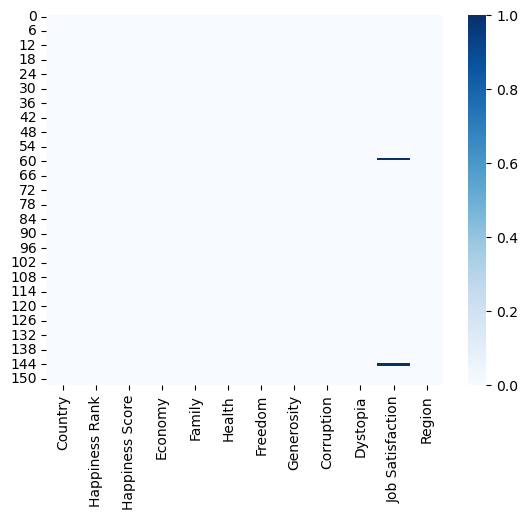

In [469]:
sns.heatmap(df1.isnull(),cmap='Blues')

In [470]:
df1.columns

Index(['Country', 'Happiness Rank', 'Happiness Score', 'Economy', 'Family',
       'Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia',
       'Job Satisfaction', 'Region'],
      dtype='object')

# Filling the null values

Filling the null values of Job satisfaction by mean values

In [471]:
mean=df1['Job Satisfaction'].mean()

In [472]:
df1['Job Satisfaction'].fillna(value=mean,inplace=True)

In [473]:
df1.isnull().sum()

Country             0
Happiness Rank      0
Happiness Score     0
Economy             0
Family              0
Health              0
Freedom             0
Generosity          0
Corruption          0
Dystopia            0
Job Satisfaction    0
Region              0
dtype: int64

<Axes: >

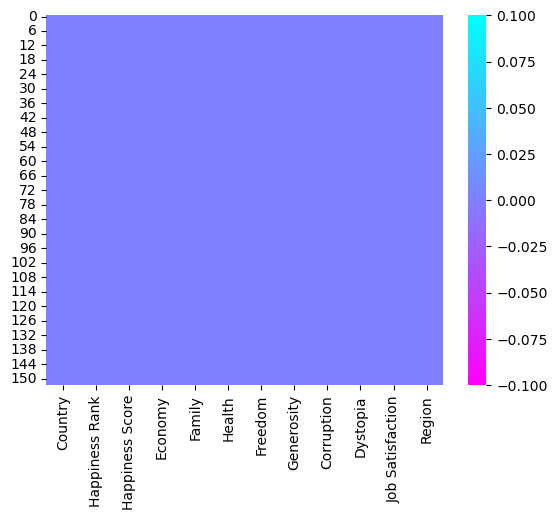

In [474]:
sns.heatmap(df1.isnull(),cmap='cool_r')

Now no values are missing in the dataset

In [475]:
df1['Region'].value_counts()

Africa            44
Asia-Pacific      43
Latin America     22
Eastern Europe    22
Western Europe    19
North America      2
Europe             1
Name: Region, dtype: int64

# Summary Statistics

In [476]:
df1.describe()

Happiness Rank  Happiness Score     Economy      Family      Health  \
count      153.000000       153.000000  153.000000  153.000000  153.000000   
mean        78.169935         5.349281    0.982433    1.186630    0.550117   
std         45.008741         1.134997    0.421901    0.288441    0.237769   
min          1.000000         2.693000    0.000000    0.000000    0.000000   
25%         40.000000         4.497000    0.659517    1.041990    0.364509   
50%         78.000000         5.279000    1.064578    1.251826    0.606042   
75%        117.000000         6.098000    1.315175    1.416404    0.719217   
max        155.000000         7.537000    1.870766    1.610574    0.949492   

          Freedom  Generosity  Corruption    Dystopia  Job Satisfaction  
count  153.000000  153.000000  153.000000  153.000000        153.000000  
mean     0.408489    0.245324    0.123179    1.853072         75.209934  
std      0.150744    0.134395    0.102133    0.499490         12.876804  
min      0.000000    0.000000    0.000000    0.377914         44.400000  
25%      0.300741    0.153075    0.057070    1.597970         69.300000  
50%      0.437454    0.231503    0.089848    1.832910         78.100000  
75%      0.518631    0.322228    0.153066    2.150801         85.000000  
max      0.658249    0.838075    0.464308    3.117485         95.100000

From the summary statistics we can observe the below points:
    
1. Economy,Freedom, has left side skewness since the mean is less than median

2. While other has righ side skewness since the mean is more than median

3. And also there is sudden increase in the value for Generosity and Corruption since sudden increase in value betweein 75% quantile and max value which indicates the presence of outliers
and confirmation of outliers can be indicated by boxplot


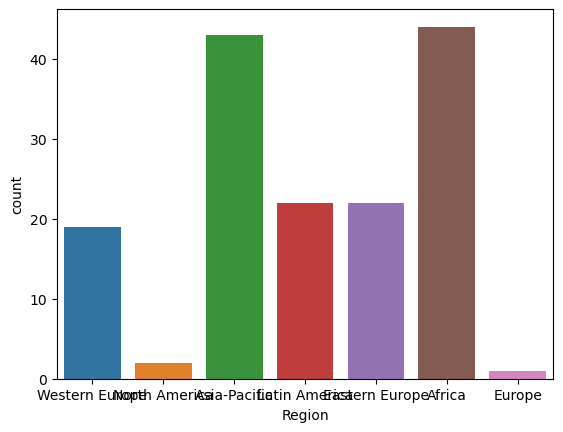

In [477]:
dt1=sns.countplot(data=df1,x='Region')

<Axes: xlabel='Economy', ylabel='Density'>

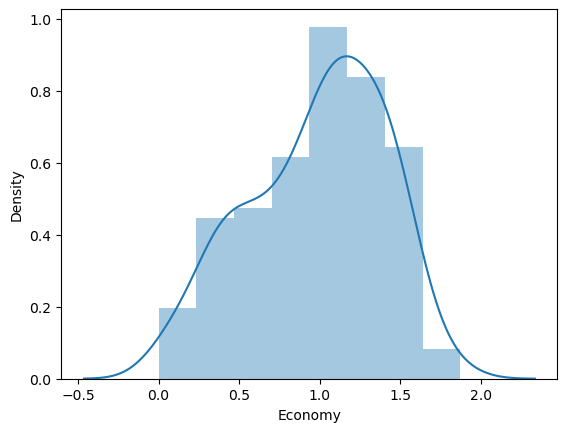

In [478]:
sns.distplot(df1['Economy'])

In [479]:
categorical_col=[]
for i in df1.dtypes.index:
    if df1.dtypes[i] =='object':
        categorical_col.append(i)
print("Categorcal Columns:",categorical_col)
print("\n")

numerical_col=[]
for i in df1.dtypes.index:
    if df1.dtypes[i]!='object':
        numerical_col.append(i)
print("Numerical Columns:",numerical_col)

Categorcal Columns: ['Country', 'Region']


Numerical Columns: ['Happiness Rank', 'Happiness Score', 'Economy', 'Family', 'Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia', 'Job Satisfaction']


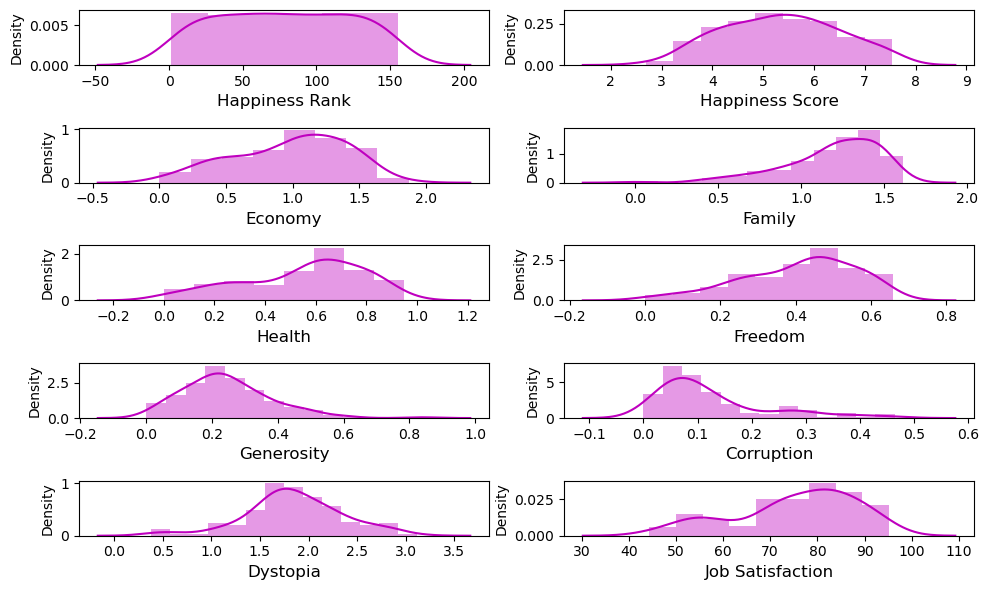

In [480]:
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for col in  numerical_col:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.distplot(df1[col],color='m')
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

<Axes: xlabel='Economy', ylabel='Health'>

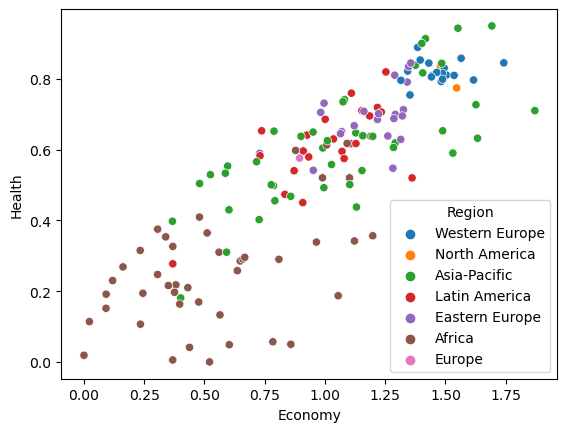

In [481]:
sns.scatterplot(x='Economy',y='Health',hue='Region',data=df1)

From the above graph we can conclude that the Africa region has the lowest economy as well as bad health where as the Asia-pacific region has good economy with good health

<Axes: xlabel='Economy', ylabel='Happiness Rank'>

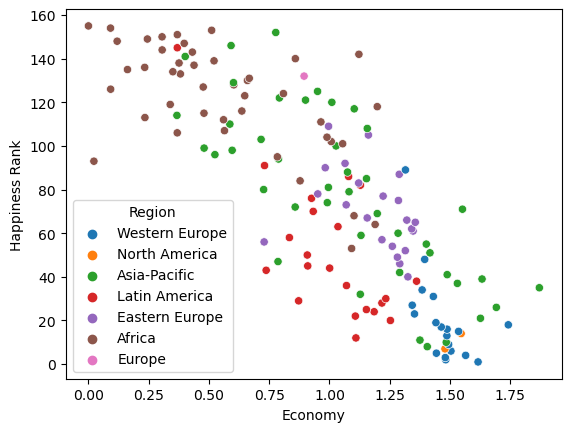

In [482]:
sns.scatterplot(x='Economy',y='Happiness Rank',hue='Region',data=df1)

We can see that the people in African region is least happy where as people in the Western EEurope and Asia-Pacific are more happy

<Axes: xlabel='Family', ylabel='Happiness Rank'>

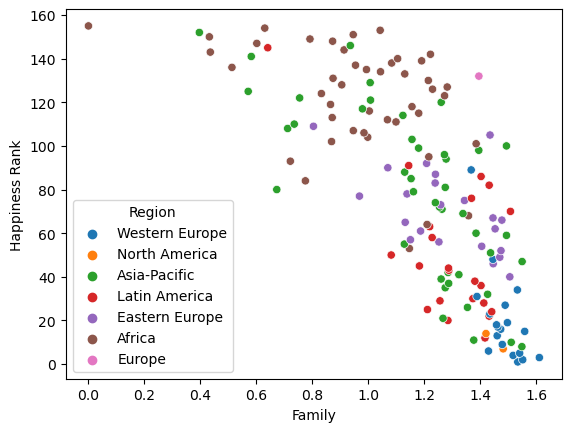

In [483]:
sns.scatterplot(x='Family',y='Happiness Rank',hue='Region',data=df1)

We can see the Happiness rankwise the family of Wester Europe is on top followed by Asia-Pacific family and the AFrican Family has the last rank in terms of Happiness

<Axes: xlabel='Family', ylabel='Happiness Score'>

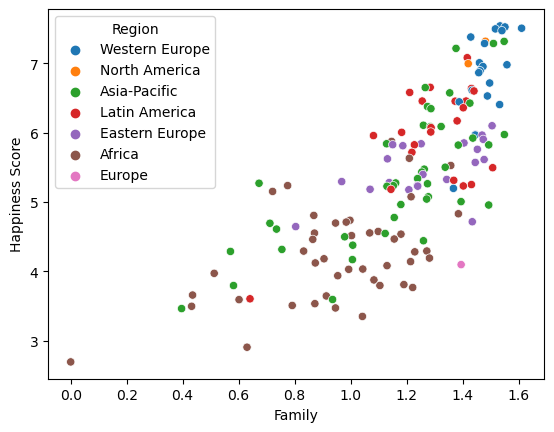

In [484]:
sns.scatterplot(x='Family',y='Happiness Score',hue='Region',data=df1)

Western Europe family has the highest score and the African Family has the least happiness score 

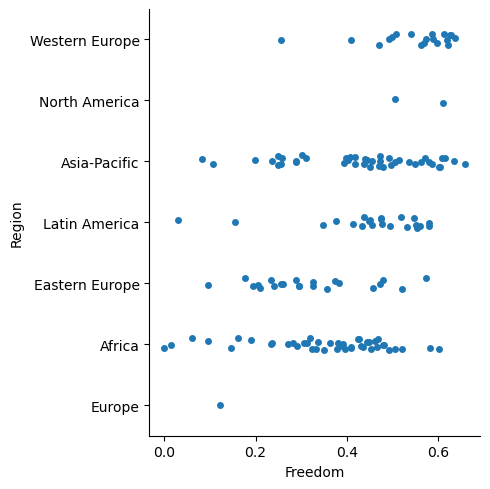

In [485]:
sns.catplot(x='Freedom',y='Region',data=df1)

From the category plot we can say that Asia-Pacific and Africa region have the more freedom while the North-AMerica has least freedom

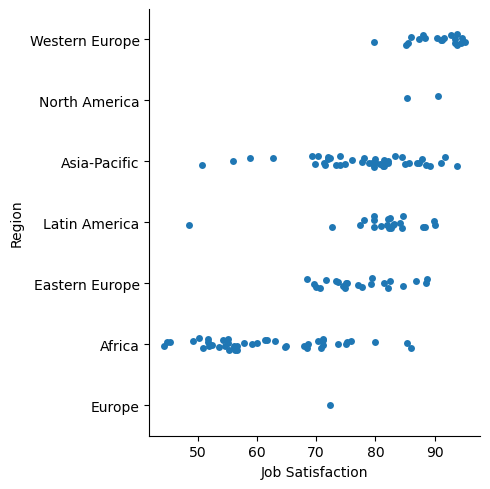

In [486]:
sns.catplot(x='Job Satisfaction',y='Region',data=df1)

When we talk about the Job Satisfaction the Asia-Pacific are highly satisfied with their job and African people is moderatley satisfied while European and North America people is less satisfied

<Axes: xlabel='Region', ylabel='Happiness Rank'>

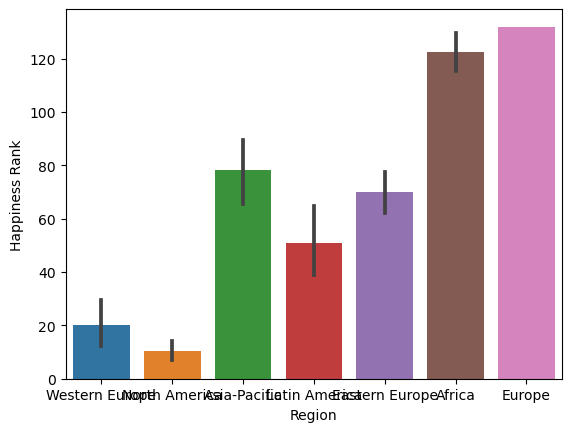

In [487]:
sns.barplot(x='Region',y='Happiness Rank',data=df1)

From the above graph we can see that the in terms of happiness rank the Europe is first

<Axes: xlabel='Region', ylabel='Economy'>

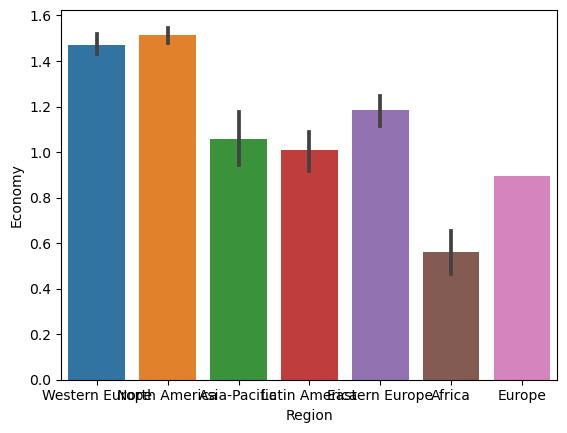

In [488]:
sns.barplot(x='Region',y='Economy',data=df1)

North America is the top in terms of economy while Africa is the last one in terms of Economy

<Axes: xlabel='Region', ylabel='Health'>

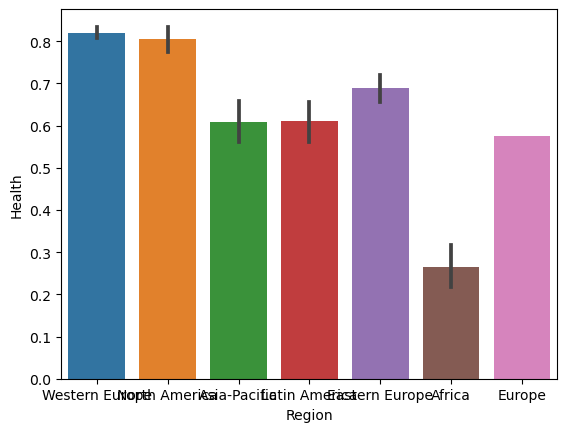

In [489]:
sns.barplot(x='Region',y='Health',data=df1)

Western Europe is the First country in terms of health followed by North America and Africa is the last country in terms of health

<Axes: xlabel='Region', ylabel='Corruption'>

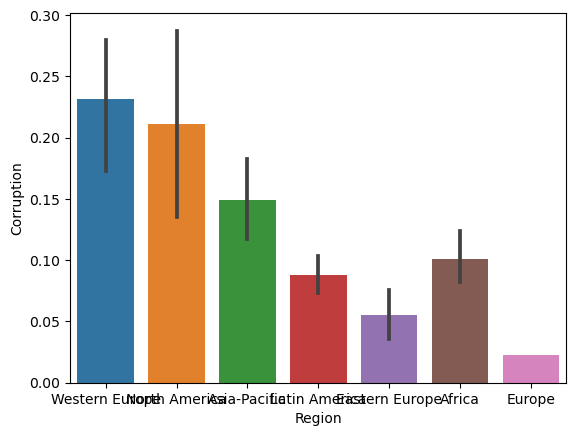

In [490]:
sns.barplot(x='Region',y='Corruption',data=df1)

Europe is the country where least corruption happens and Western Europe has the highest chances of Corruption

<Axes: xlabel='Family', ylabel='Region'>

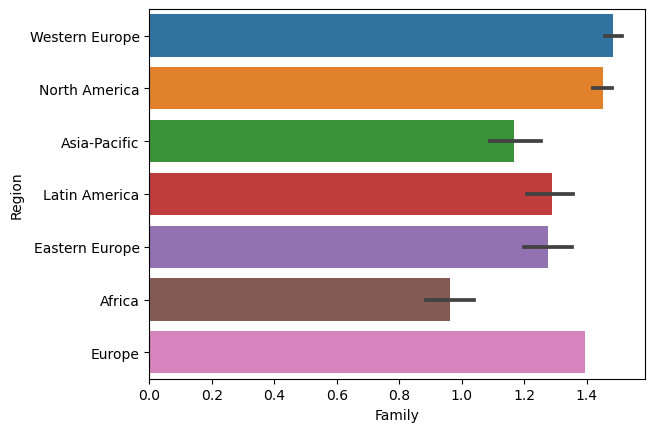

In [491]:
sns.barplot(x='Family',y='Region',data=df1)

Europian region has the more number of family compared to Africa

<Axes: xlabel='Generosity', ylabel='Region'>

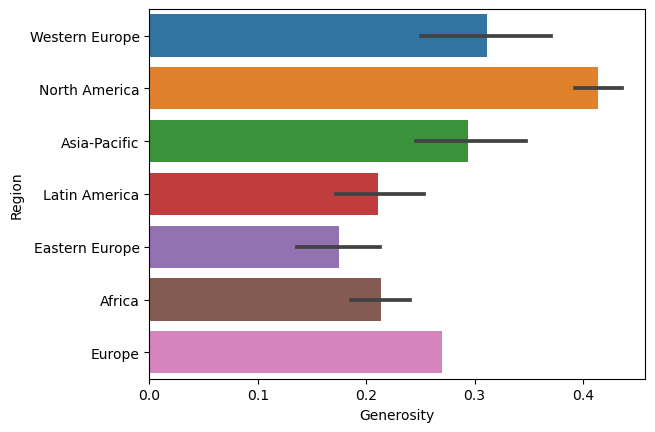

In [492]:
sns.barplot(x='Generosity',y='Region',data=df1)

In terms of Generosity North America is highest and the Eastern Europe is lowest

<Axes: xlabel='Dystopia', ylabel='Region'>

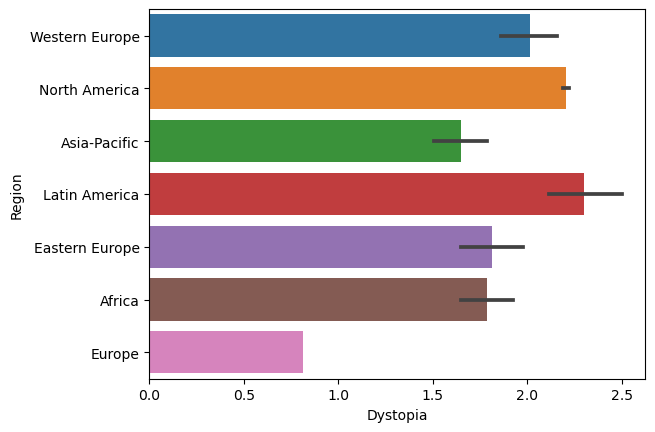

In [493]:
sns.barplot(x='Dystopia',y='Region',data=df1)

In terms of dystopia Latin america is highest followed by North America, Western Europe and Europe is lowest

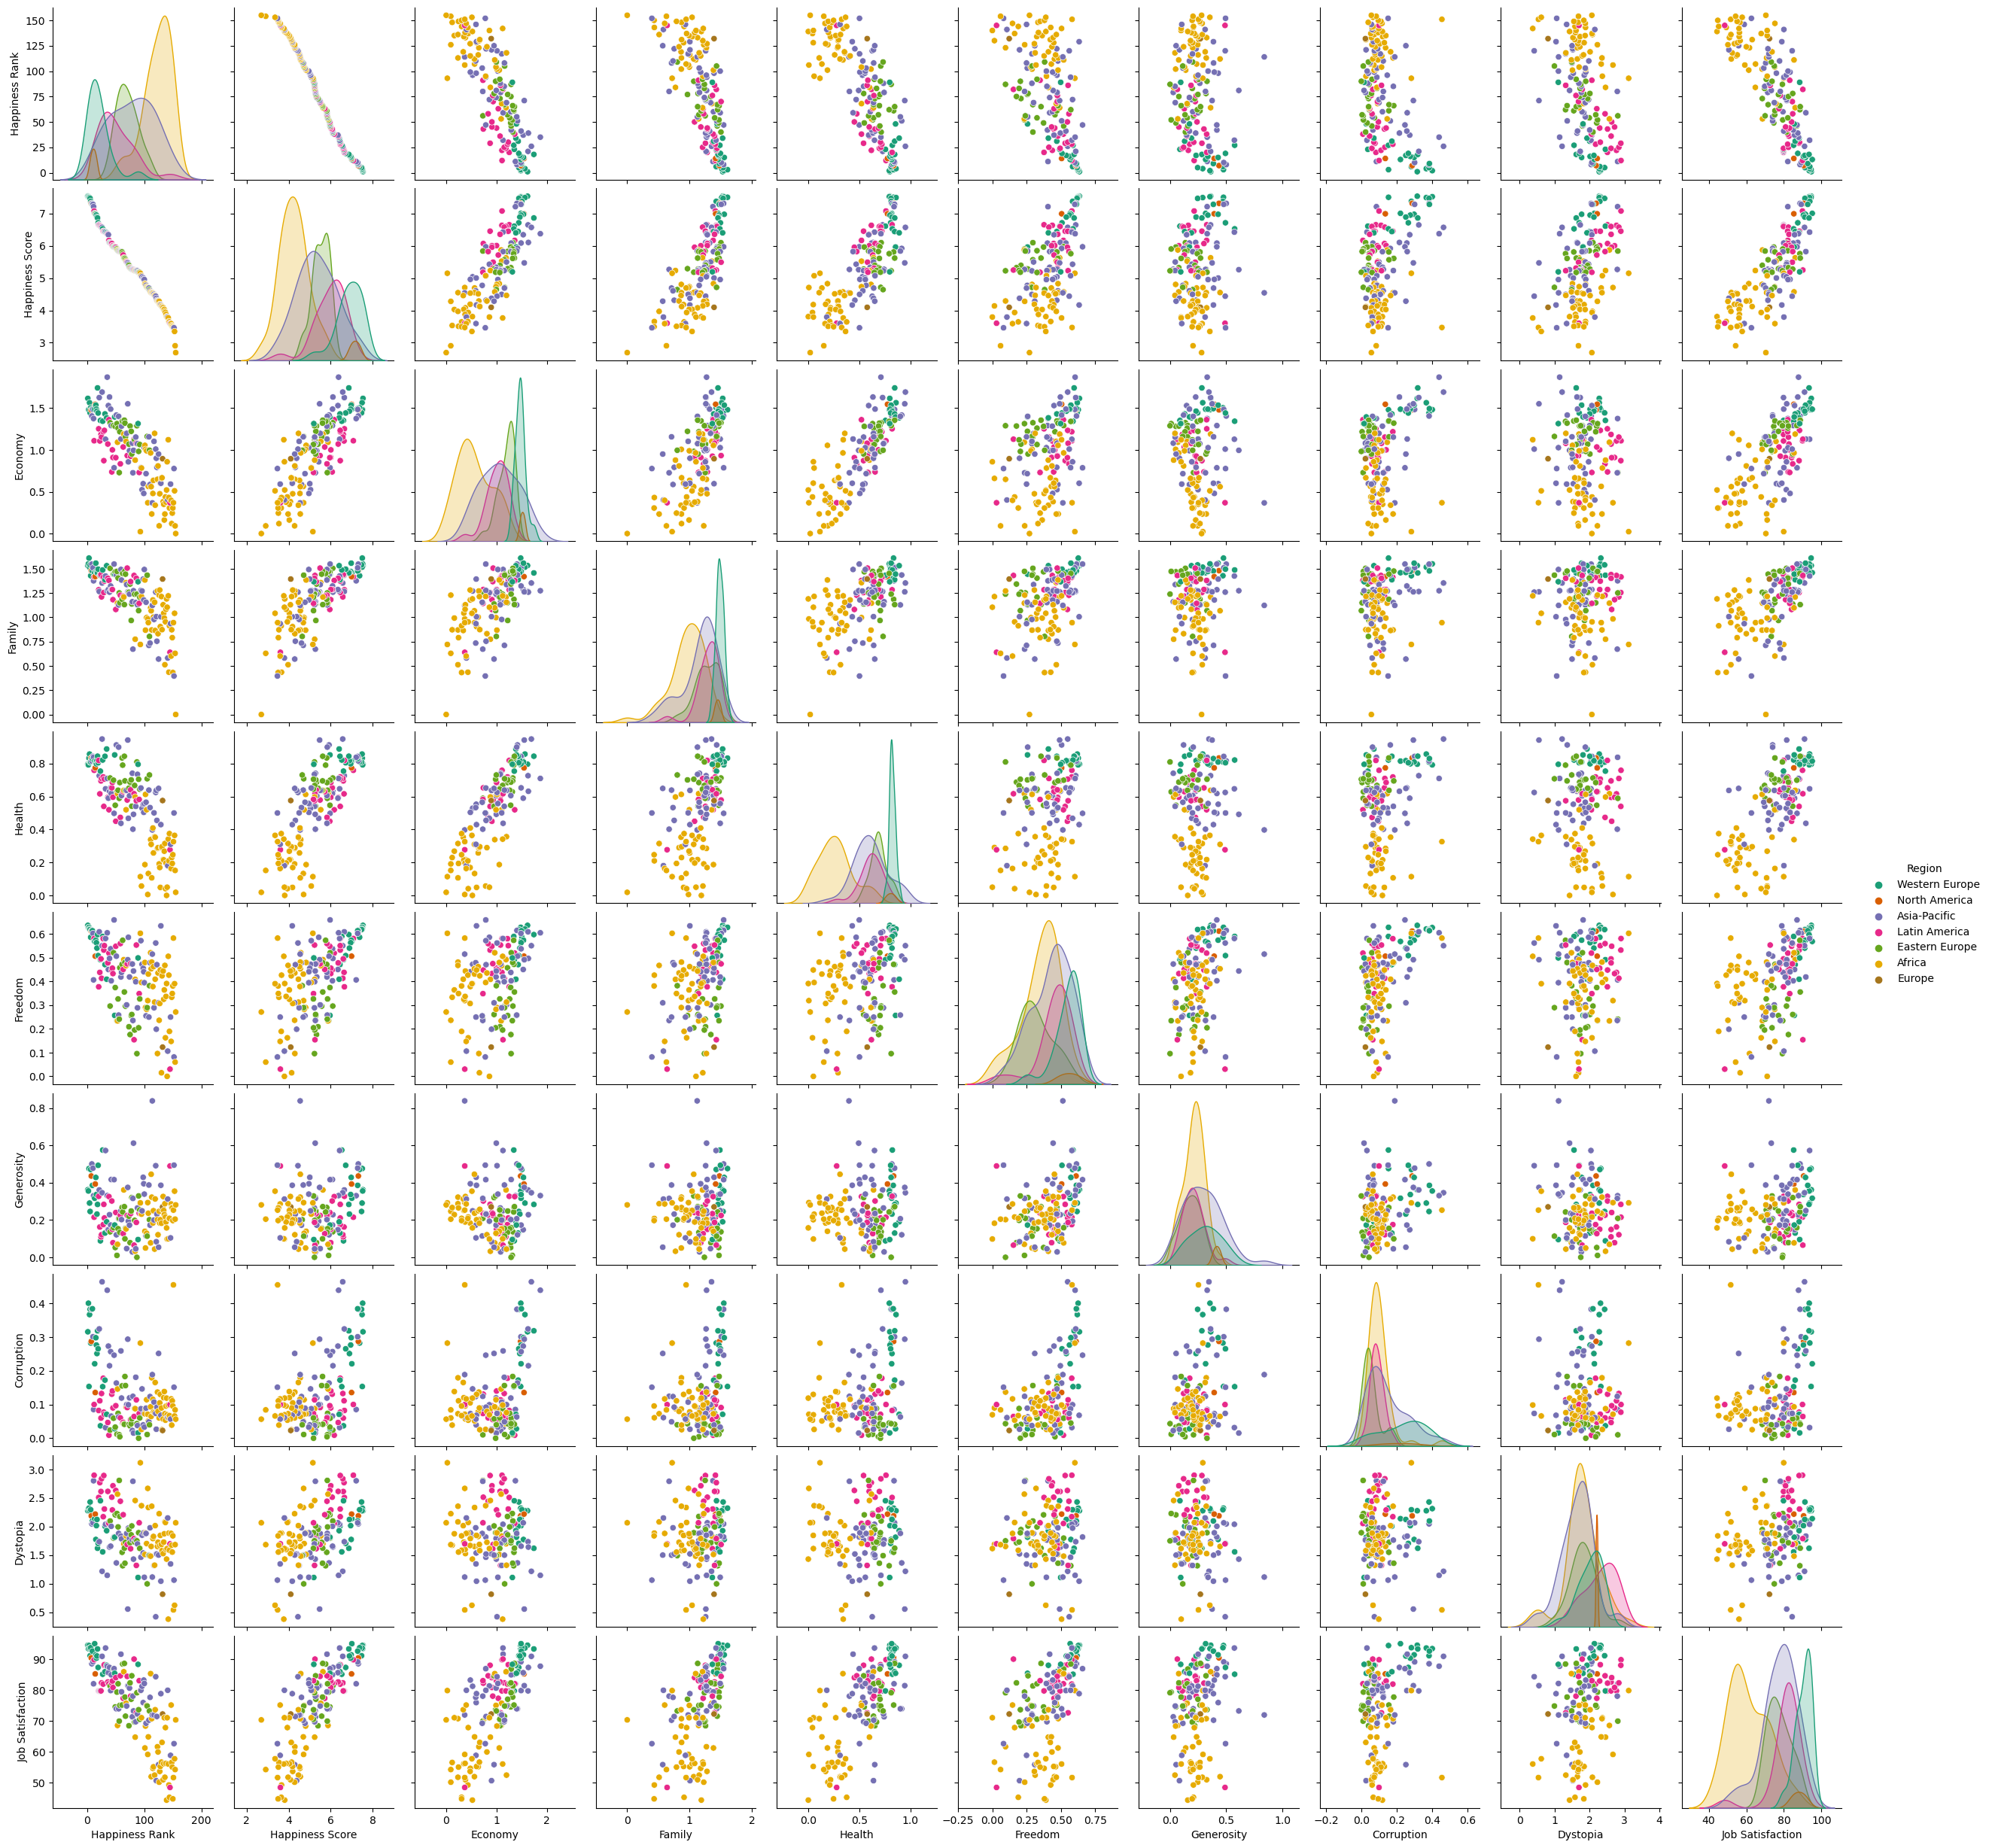

In [494]:
sns.pairplot(data=df1,hue='Region',palette='Dark2')

In [495]:
df1.corr()

Happiness Rank  Happiness Score   Economy    Family  \
Happiness Rank          1.000000        -0.992782 -0.811916 -0.738380   
Happiness Score        -0.992782         1.000000  0.811194  0.753815   
Economy                -0.811916         0.811194  1.000000  0.688701   
Family                 -0.738380         0.753815  0.688701  1.000000   
Health                 -0.779191         0.780496  0.841900  0.612003   
Freedom                -0.558380         0.576027  0.375043  0.425937   
Generosity             -0.138480         0.160010 -0.017310  0.046005   
Corruption             -0.413378         0.435854  0.357817  0.233749   
Dystopia               -0.482534         0.474300  0.018464  0.073697   
Job Satisfaction       -0.807828         0.805963  0.694477  0.614709   

                    Health   Freedom  Generosity  Corruption  Dystopia  \
Happiness Rank   -0.779191 -0.558380   -0.138480   -0.413378 -0.482534   
Happiness Score   0.780496  0.576027    0.160010    0.435854  0.474300   
Economy           0.841900  0.375043   -0.017310    0.357817  0.018464   
Family            0.612003  0.425937    0.046005    0.233749  0.073697   
Health            1.000000  0.354683    0.065979    0.285952  0.049716   
Freedom           0.354683  1.000000    0.312880    0.497729  0.089590   
Generosity        0.065979  0.312880    1.000000    0.292364 -0.103064   
Corruption        0.285952  0.497729    0.292364    1.000000 -0.016260   
Dystopia          0.049716  0.089590   -0.103064   -0.016260  1.000000   
Job Satisfaction  0.695278  0.495369    0.219947    0.337017  0.281307   

                  Job Satisfaction  
Happiness Rank           -0.807828  
Happiness Score           0.805963  
Economy                   0.694477  
Family                    0.614709  
Health                    0.695278  
Freedom                   0.495369  
Generosity                0.219947  
Corruption                0.337017  
Dystopia                  0.281307  
Job Satisfaction          1.000000

<Axes: >

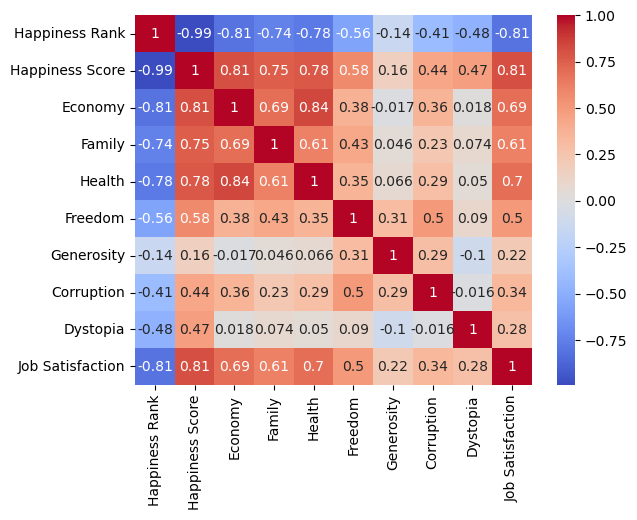

In [496]:
sns.heatmap(df1.corr(),cmap='coolwarm',annot=True)

From the above heatmap we can observe some points:

1. Happiness score and Econoy has positive correlation

2. Econoy and Family has positive correlation 

3. Dystopia and Corruption has negative correlation with each other

4. Job Satisfaction imapcting very negative value to the Happiness rank

Happiness Rank         Axes(0.125,0.747241;0.133621x0.132759)
Happiness Score     Axes(0.285345,0.747241;0.133621x0.132759)
Economy              Axes(0.44569,0.747241;0.133621x0.132759)
Family              Axes(0.606034,0.747241;0.133621x0.132759)
Health              Axes(0.766379,0.747241;0.133621x0.132759)
Freedom                Axes(0.125,0.587931;0.133621x0.132759)
Generosity          Axes(0.285345,0.587931;0.133621x0.132759)
Corruption           Axes(0.44569,0.587931;0.133621x0.132759)
Dystopia            Axes(0.606034,0.587931;0.133621x0.132759)
Job Satisfaction    Axes(0.766379,0.587931;0.133621x0.132759)
dtype: object

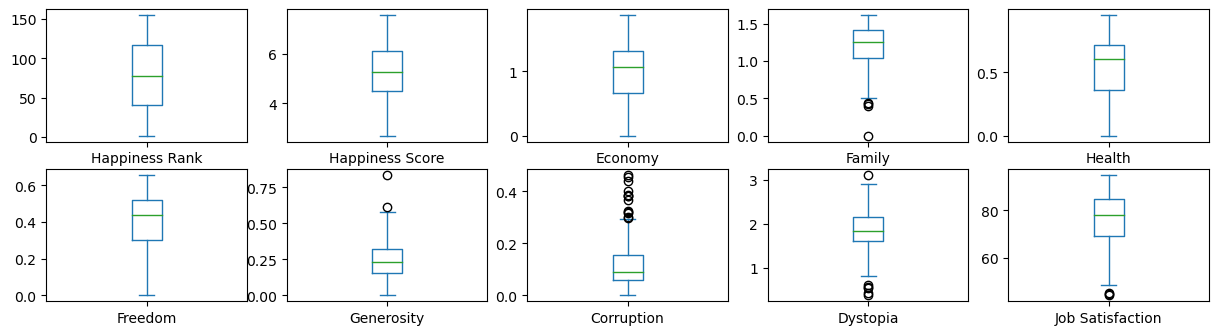

In [497]:
df1.plot(kind='box',subplots=True,layout=(5,5),figsize=(15,10))

From the above box plot we can conclude that the Corruption, Dystopia, Family, and Job satisfaction have the outliers and we can remove this outliers by using the zscore

In [498]:
df1.drop('Job Satisfaction',axis=1,inplace=True)
df1

Country  Happiness Rank  Happiness Score   Economy  \
0                      Norway               1            7.537  1.616463   
1                     Denmark               2            7.522  1.482383   
2                     Iceland               3            7.504  1.480633   
3                 Switzerland               4            7.494  1.564980   
4                     Finland               5            7.469  1.443572   
..                        ...             ...              ...       ...   
148                    Rwanda             151            3.471  0.368746   
149                     Syria             152            3.462  0.777153   
150                  Tanzania             153            3.349  0.511136   
151                   Burundi             154            2.905  0.091623   
152  Central African Republic             155            2.693  0.000000   

       Family    Health   Freedom  Generosity  Corruption  Dystopia  \
0    1.533524  0.796667  0.635423    0.362012    0.315964  2.277027   
1    1.551122  0.792566  0.626007    0.355280    0.400770  2.313707   
2    1.610574  0.833552  0.627163    0.475540    0.153527  2.322715   
3    1.516912  0.858131  0.620071    0.290549    0.367007  2.276716   
4    1.540247  0.809158  0.617951    0.245483    0.382612  2.430182   
..        ...       ...       ...         ...         ...       ...   
148  0.945707  0.326425  0.581844    0.252756    0.455220  0.540061   
149  0.396103  0.500533  0.081539    0.493664    0.151347  1.061574   
150  1.041990  0.364509  0.390018    0.354256    0.066035  0.621130   
151  0.629794  0.151611  0.059901    0.204435    0.084148  1.683024   
152  0.000000  0.018773  0.270842    0.280876    0.056565  2.066005   

             Region  
0    Western Europe  
1    Western Europe  
2    Western Europe  
3    Western Europe  
4    Western Europe  
..              ...  
148          Africa  
149    Asia-Pacific  
150          Africa  
151          Africa  
152          Africa  

[153 rows x 11 columns]

In [499]:
from sklearn.preprocessing import LabelEncoder
lencode=LabelEncoder()
df1['Region']=lencode.fit_transform(df1['Region'])
df1

Country  Happiness Rank  Happiness Score   Economy  \
0                      Norway               1            7.537  1.616463   
1                     Denmark               2            7.522  1.482383   
2                     Iceland               3            7.504  1.480633   
3                 Switzerland               4            7.494  1.564980   
4                     Finland               5            7.469  1.443572   
..                        ...             ...              ...       ...   
148                    Rwanda             151            3.471  0.368746   
149                     Syria             152            3.462  0.777153   
150                  Tanzania             153            3.349  0.511136   
151                   Burundi             154            2.905  0.091623   
152  Central African Republic             155            2.693  0.000000   

       Family    Health   Freedom  Generosity  Corruption  Dystopia  Region  
0    1.533524  0.796667  0.635423    0.362012    0.315964  2.277027       6  
1    1.551122  0.792566  0.626007    0.355280    0.400770  2.313707       6  
2    1.610574  0.833552  0.627163    0.475540    0.153527  2.322715       6  
3    1.516912  0.858131  0.620071    0.290549    0.367007  2.276716       6  
4    1.540247  0.809158  0.617951    0.245483    0.382612  2.430182       6  
..        ...       ...       ...         ...         ...       ...     ...  
148  0.945707  0.326425  0.581844    0.252756    0.455220  0.540061       0  
149  0.396103  0.500533  0.081539    0.493664    0.151347  1.061574       1  
150  1.041990  0.364509  0.390018    0.354256    0.066035  0.621130       0  
151  0.629794  0.151611  0.059901    0.204435    0.084148  1.683024       0  
152  0.000000  0.018773  0.270842    0.280876    0.056565  2.066005       0  

[153 rows x 11 columns]

In [500]:
from sklearn.preprocessing import LabelEncoder
lencode=LabelEncoder()
df1['Country']=lencode.fit_transform(df1['Country'])
df1

Country  Happiness Rank  Happiness Score   Economy    Family    Health  \
0        103               1            7.537  1.616463  1.533524  0.796667   
1         36               2            7.522  1.482383  1.551122  0.792566   
2         56               3            7.504  1.480633  1.610574  0.833552   
3        131               4            7.494  1.564980  1.516912  0.858131   
4         43               5            7.469  1.443572  1.540247  0.809158   
..       ...             ...              ...       ...       ...       ...   
148      115             151            3.471  0.368746  0.945707  0.326425   
149      132             152            3.462  0.777153  0.396103  0.500533   
150      134             153            3.349  0.511136  1.041990  0.364509   
151       21             154            2.905  0.091623  0.629794  0.151611   
152       25             155            2.693  0.000000  0.000000  0.018773   

      Freedom  Generosity  Corruption  Dystopia  Region  
0    0.635423    0.362012    0.315964  2.277027       6  
1    0.626007    0.355280    0.400770  2.313707       6  
2    0.627163    0.475540    0.153527  2.322715       6  
3    0.620071    0.290549    0.367007  2.276716       6  
4    0.617951    0.245483    0.382612  2.430182       6  
..        ...         ...         ...       ...     ...  
148  0.581844    0.252756    0.455220  0.540061       0  
149  0.081539    0.493664    0.151347  1.061574       1  
150  0.390018    0.354256    0.066035  0.621130       0  
151  0.059901    0.204435    0.084148  1.683024       0  
152  0.270842    0.280876    0.056565  2.066005       0  

[153 rows x 11 columns]

In [501]:
from scipy.stats import zscore

In [502]:
dfzscore=np.abs(zscore(df1))
print(np.where(dfzscore>3))

(array([ 25,  33, 111, 148, 152], dtype=int64), array([8, 8, 7, 8, 4], dtype=int64))


In [579]:
dfnew=df1[(dfzscore<3).all(axis=1)]
dfnew

Country  Happiness Rank  Happiness Score   Economy    Family    Health  \
0        103               1            7.537  1.616463  1.533524  0.796667   
1         36               2            7.522  1.482383  1.551122  0.792566   
2         56               3            7.504  1.480633  1.610574  0.833552   
3        131               4            7.494  1.564980  1.516912  0.858131   
4         43               5            7.469  1.443572  1.540247  0.809158   
..       ...             ...              ...       ...       ...       ...   
146       51             149            3.507  0.244550  0.791245  0.194129   
147      136             150            3.495  0.305445  0.431883  0.247106   
149      132             152            3.462  0.777153  0.396103  0.500533   
150      134             153            3.349  0.511136  1.041990  0.364509   
151       21             154            2.905  0.091623  0.629794  0.151611   

      Freedom  Generosity  Corruption  Dystopia  Region  
0    0.635423    0.362012    0.315964  2.277027       6  
1    0.626007    0.355280    0.400770  2.313707       6  
2    0.627163    0.475540    0.153527  2.322715       6  
3    0.620071    0.290549    0.367007  2.276716       6  
4    0.617951    0.245483    0.382612  2.430182       6  
..        ...         ...         ...       ...     ...  
146  0.348588    0.264815    0.110938  1.552312       0  
147  0.380426    0.196896    0.095665  1.837229       0  
149  0.081539    0.493664    0.151347  1.061574       1  
150  0.390018    0.354256    0.066035  0.621130       0  
151  0.059901    0.204435    0.084148  1.683024       0  

[148 rows x 11 columns]

In [580]:
df1.shape

(153, 11)

In [581]:
dfnew.shape

(148, 11)

In [582]:
x1=dfnew.iloc[:,:-1]
x1

Country  Happiness Rank  Happiness Score   Economy    Family    Health  \
0        103               1            7.537  1.616463  1.533524  0.796667   
1         36               2            7.522  1.482383  1.551122  0.792566   
2         56               3            7.504  1.480633  1.610574  0.833552   
3        131               4            7.494  1.564980  1.516912  0.858131   
4         43               5            7.469  1.443572  1.540247  0.809158   
..       ...             ...              ...       ...       ...       ...   
146       51             149            3.507  0.244550  0.791245  0.194129   
147      136             150            3.495  0.305445  0.431883  0.247106   
149      132             152            3.462  0.777153  0.396103  0.500533   
150      134             153            3.349  0.511136  1.041990  0.364509   
151       21             154            2.905  0.091623  0.629794  0.151611   

      Freedom  Generosity  Corruption  Dystopia  
0    0.635423    0.362012    0.315964  2.277027  
1    0.626007    0.355280    0.400770  2.313707  
2    0.627163    0.475540    0.153527  2.322715  
3    0.620071    0.290549    0.367007  2.276716  
4    0.617951    0.245483    0.382612  2.430182  
..        ...         ...         ...       ...  
146  0.348588    0.264815    0.110938  1.552312  
147  0.380426    0.196896    0.095665  1.837229  
149  0.081539    0.493664    0.151347  1.061574  
150  0.390018    0.354256    0.066035  0.621130  
151  0.059901    0.204435    0.084148  1.683024  

[148 rows x 10 columns]

We have removed the outliers from our data

In [583]:
y1=dfnew.iloc[:,-1]
y1

0      6
1      6
2      6
3      6
4      6
      ..
146    0
147    0
149    1
150    0
151    0
Name: Region, Length: 148, dtype: int32

In [586]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x1=pd.DataFrame(scaler.fit_transform(x1),columns=x1.columns)
x1

Country   Economy    Health   Freedom  Generosity  Corruption  Dystopia
0    0.622303  1.562877  1.046956  1.533537    0.965817    2.175935  0.831941
1   -0.889396  1.230197  1.029374  1.470802    0.912629    3.101086  0.907766
2   -0.438143  1.225855  1.205098  1.478504    1.862804    0.403907  0.926387
3    1.254057  1.435136  1.310478  1.431252    0.401186    2.732767  0.831299
4   -0.731457  1.133899  1.100510  1.417129    0.045115    2.902994  1.148538
..        ...       ...       ...       ...         ...         ...       ...
143 -0.550956 -1.841121 -1.536339 -0.377555    0.197860   -0.060696 -0.666171
144  1.366871 -1.690029 -1.309210 -0.165424   -0.338769   -0.227305 -0.077197
145  1.276620 -0.519623 -0.222674 -2.156812    2.005998    0.380131 -1.680613
146  1.321745 -1.179667 -0.805858 -0.101518    0.904537   -0.550537 -2.591085
147 -1.227836 -2.220566 -1.718631 -2.300984   -0.279203   -0.352944 -0.395966

[148 rows x 7 columns]

In [587]:
y1.value_counts()

0    42
1    40
4    22
2    22
6    19
5     2
3     1
Name: Region, dtype: int64

# VIF

In [588]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [622]:
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x1.columns))]
vif['Features']=x1.columns

vif

VIF values    Features
0    1.035202     Country
1    3.778399     Economy
2    3.482479      Health
3    1.501680     Freedom
4    1.235429  Generosity
5    1.461737  Corruption
6    1.065299    Dystopia

In [590]:
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns

vif

VIF values    Features
0    1.035202     Country
1    3.778399     Economy
2    3.482479      Health
3    1.501680     Freedom
4    1.235429  Generosity
5    1.461737  Corruption
6    1.065299    Dystopia

In [591]:
y1.value_counts()

0    42
1    40
4    22
2    22
6    19
5     2
3     1
Name: Region, dtype: int64

# Modelling

In [595]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [596]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [597]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lrpred=lr.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,lrpred))
print("Confusion matrix:",confusion_matrix(y_test,lrpred))
print("Classification report:",classification_report(y_test,lrpred))

Accuracy score: 0.5306122448979592
Confusion matrix: [[10  3  0  0  0]
 [ 5  6  2  1  1]
 [ 0  1  3  1  0]
 [ 1  3  0  3  0]
 [ 0  1  3  1  4]]
Classification report:               precision    recall  f1-score   support

           0       0.62      0.77      0.69        13
           1       0.43      0.40      0.41        15
           2       0.38      0.60      0.46         5
           4       0.50      0.43      0.46         7
           6       0.80      0.44      0.57         9

    accuracy                           0.53        49
   macro avg       0.55      0.53      0.52        49
weighted avg       0.55      0.53      0.53        49



In [598]:
from sklearn.svm import SVC
svm1=SVC(kernel='poly')
svm1.fit(x_train,y_train)
svmpred1=svm1.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,svmpred1))
print("Confusion matrix:",confusion_matrix(y_test,svmpred1))
print("Classification report:",classification_report(y_test,svmpred1))

Accuracy score: 0.5306122448979592
Confusion matrix: [[11  2  0  0  0]
 [ 2  9  1  1  2]
 [ 0  4  1  0  0]
 [ 1  4  0  2  0]
 [ 0  5  0  1  3]]
Classification report:               precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.38      0.60      0.46        15
           2       0.50      0.20      0.29         5
           4       0.50      0.29      0.36         7
           6       0.60      0.33      0.43         9

    accuracy                           0.53        49
   macro avg       0.55      0.45      0.47        49
weighted avg       0.56      0.53      0.52        49



In [599]:
from sklearn.svm import SVC
svm2=SVC(kernel='linear')
svm2.fit(x_train,y_train)
svmpred2=svm2.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,svmpred2))
print("Confusion matrix:",confusion_matrix(y_test,svmpred2))
print("Classification report:",classification_report(y_test,svmpred2))

Accuracy score: 0.5510204081632653
Confusion matrix: [[10  3  0  0  0]
 [ 4  6  2  0  3]
 [ 0  0  4  1  0]
 [ 1  3  0  2  1]
 [ 0  0  3  1  5]]
Classification report:               precision    recall  f1-score   support

           0       0.67      0.77      0.71        13
           1       0.50      0.40      0.44        15
           2       0.44      0.80      0.57         5
           4       0.50      0.29      0.36         7
           6       0.56      0.56      0.56         9

    accuracy                           0.55        49
   macro avg       0.53      0.56      0.53        49
weighted avg       0.55      0.55      0.54        49



In [600]:
from sklearn.svm import SVC
svm3=SVC(kernel='rbf')
svm3.fit(x_train,y_train)
svmpred3=svm3.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,svmpred3))
print("Confusion matrix:",confusion_matrix(y_test,svmpred3))
print("Classification report:",classification_report(y_test,svmpred3))

Accuracy score: 0.5306122448979592
Confusion matrix: [[10  3  0  0  0]
 [ 4  6  2  2  1]
 [ 0  1  4  0  0]
 [ 1  3  0  3  0]
 [ 0  4  1  1  3]]
Classification report:               precision    recall  f1-score   support

           0       0.67      0.77      0.71        13
           1       0.35      0.40      0.38        15
           2       0.57      0.80      0.67         5
           4       0.50      0.43      0.46         7
           6       0.75      0.33      0.46         9

    accuracy                           0.53        49
   macro avg       0.57      0.55      0.54        49
weighted avg       0.55      0.53      0.52        49



In [601]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predrfc=RFC.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.6122448979591837
[[12  1  0  0  0]
 [ 3  6  2  1  3]
 [ 0  0  5  0  0]
 [ 1  3  0  3  0]
 [ 0  3  1  1  4]]
              precision    recall  f1-score   support

           0       0.75      0.92      0.83        13
           1       0.46      0.40      0.43        15
           2       0.62      1.00      0.77         5
           4       0.60      0.43      0.50         7
           6       0.57      0.44      0.50         9

    accuracy                           0.61        49
   macro avg       0.60      0.64      0.61        49
weighted avg       0.59      0.61      0.59        49



In [602]:
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
etpred=ET.predict(x_test)
print(accuracy_score(y_test,etpred))
print(classification_report(y_test,etpred))
print(confusion_matrix(y_test,etpred))

0.5714285714285714
              precision    recall  f1-score   support

           0       0.73      0.85      0.79        13
           1       0.50      0.47      0.48        15
           2       0.40      0.80      0.53         5
           4       0.50      0.29      0.36         7
           5       0.00      0.00      0.00         0
           6       0.80      0.44      0.57         9

    accuracy                           0.57        49
   macro avg       0.49      0.47      0.46        49
weighted avg       0.61      0.57      0.57        49

[[11  2  0  0  0  0]
 [ 3  7  2  1  1  1]
 [ 0  1  4  0  0  0]
 [ 1  3  1  2  0  0]
 [ 0  0  0  0  0  0]
 [ 0  1  3  1  0  4]]


In [603]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
gbpred=GB.predict(x_test)
print(accuracy_score(y_test,gbpred))
print(confusion_matrix(y_test,gbpred))
print(classification_report(y_test,gbpred))

0.5510204081632653
[[12  1  0  0  0]
 [ 3  6  2  1  3]
 [ 1  1  3  0  0]
 [ 1  3  0  3  0]
 [ 0  4  1  1  3]]
              precision    recall  f1-score   support

           0       0.71      0.92      0.80        13
           1       0.40      0.40      0.40        15
           2       0.50      0.60      0.55         5
           4       0.60      0.43      0.50         7
           6       0.50      0.33      0.40         9

    accuracy                           0.55        49
   macro avg       0.54      0.54      0.53        49
weighted avg       0.54      0.55      0.54        49



In [604]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
abcpred=ABC.predict(x_test)
print(accuracy_score(y_test,abcpred))
print(confusion_matrix(y_test,abcpred))
print(classification_report(y_test,abcpred))

0.3877551020408163
[[10  1  0  2  0  0]
 [ 3  9  3  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 1  4  2  0  0  0]
 [ 0  1  8  0  0  0]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        13
           1       0.45      0.60      0.51        15
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         7
           6       0.00      0.00      0.00         9

    accuracy                           0.39        49
   macro avg       0.19      0.23      0.21        49
weighted avg       0.33      0.39      0.35        49



In [605]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knnpred=knn.predict(x_test)
print(accuracy_score(y_test,knnpred))
print(confusion_matrix(y_test,knnpred))
print(classification_report(y_test,knnpred))

0.5306122448979592
[[11  2  0  0  0]
 [ 4  5  3  2  1]
 [ 0  0  4  1  0]
 [ 1  3  0  3  0]
 [ 0  3  2  1  3]]
              precision    recall  f1-score   support

           0       0.69      0.85      0.76        13
           1       0.38      0.33      0.36        15
           2       0.44      0.80      0.57         5
           4       0.43      0.43      0.43         7
           6       0.75      0.33      0.46         9

    accuracy                           0.53        49
   macro avg       0.54      0.55      0.52        49
weighted avg       0.54      0.53      0.51        49



In [606]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini')
dt.fit(x_train,y_train)
dtpred=dt.predict(x_test)
print(accuracy_score(y_test,dtpred))
print(confusion_matrix(y_test,dtpred))
print(classification_report(y_test,dtpred))

0.5510204081632653
[[12  1  0  0  0  0  0]
 [ 4  7  0  1  0  0  3]
 [ 1  2  2  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 1  2  0  0  2  0  2]
 [ 0  0  0  0  0  0  0]
 [ 0  2  1  0  0  2  4]]
              precision    recall  f1-score   support

           0       0.67      0.92      0.77        13
           1       0.50      0.47      0.48        15
           2       0.67      0.40      0.50         5
           3       0.00      0.00      0.00         0
           4       1.00      0.29      0.44         7
           5       0.00      0.00      0.00         0
           6       0.44      0.44      0.44         9

    accuracy                           0.55        49
   macro avg       0.47      0.36      0.38        49
weighted avg       0.62      0.55      0.55        49



In [607]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train,y_train)
dtcpred=dtc.predict(x_test)
print(accuracy_score(y_test,dtcpred))
print(confusion_matrix(y_test,dtcpred))
print(classification_report(y_test,dtcpred))

0.4489795918367347
[[12  1  0  0  0  0]
 [ 5  4  3  0  2  1]
 [ 1  1  2  1  0  0]
 [ 1  2  2  2  0  0]
 [ 0  0  0  0  0  0]
 [ 0  3  1  1  2  2]]
              precision    recall  f1-score   support

           0       0.63      0.92      0.75        13
           1       0.36      0.27      0.31        15
           2       0.25      0.40      0.31         5
           4       0.50      0.29      0.36         7
           5       0.00      0.00      0.00         0
           6       0.67      0.22      0.33         9

    accuracy                           0.45        49
   macro avg       0.40      0.35      0.34        49
weighted avg       0.50      0.45      0.44        49



In [608]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnbpred=gnb.predict(x_test)
print(accuracy_score(y_test,gnbpred))
print(confusion_matrix(y_test,gnbpred))
print(classification_report(y_test,gnbpred))

0.6326530612244898
[[12  0  0  1  0]
 [ 4  6  3  0  2]
 [ 0  0  4  1  0]
 [ 1  2  1  3  0]
 [ 0  0  3  0  6]]
              precision    recall  f1-score   support

           0       0.71      0.92      0.80        13
           1       0.75      0.40      0.52        15
           2       0.36      0.80      0.50         5
           4       0.60      0.43      0.50         7
           6       0.75      0.67      0.71         9

    accuracy                           0.63        49
   macro avg       0.63      0.64      0.61        49
weighted avg       0.68      0.63      0.62        49



# Cross Validation

In [609]:
 from sklearn.model_selection import cross_val_score

In [610]:
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print(accuracy_score(y_test,predrfc)-score.mean())

[0.53333333 0.76666667 0.6        0.65517241 0.55172414]
0.6213793103448276
-0.009134412385643942


In [611]:
score=cross_val_score(ET,x,y)
print(score)
print(score.mean())
print(accuracy_score(y_test,etpred)-score.mean())

[0.46666667 0.8        0.63333333 0.51724138 0.55172414]
0.5937931034482758
-0.022364532019704453


In [612]:
score=cross_val_score(lr,x,y)
print(score)
print(score.mean())
print("Accuracy score is:",accuracy_score(y_test,lrpred)-score.mean())

[0.4        0.66666667 0.63333333 0.65517241 0.55172414]
0.5813793103448276
Accuracy score is: -0.050767065446868376


In [613]:
score=cross_val_score(knn,x,y)
print(score)
print(score.mean())
print(accuracy_score(y_test,knnpred)-score.mean())

[0.5        0.7        0.6        0.44827586 0.44827586]
0.5393103448275861
-0.00869809992962689


In [614]:
score=cross_val_score(dt,x,y)
print(score)
print(score.mean())
print(accuracy_score(y_test,dtpred)-score.mean())

[0.43333333 0.53333333 0.66666667 0.5862069  0.51724138]
0.5473563218390805
0.003664086324184801


In [617]:
score=cross_val_score(svm1,x,y)
print(score)
print(score.mean())
print(accuracy_score(y_test,svmpred1)-score.mean())

[0.4        0.53333333 0.56666667 0.5862069  0.4137931 ]
0.5
0.030612244897959218


In [618]:
score=cross_val_score(svm2,x,y)
print(score)
print(score.mean())
print(accuracy_score(y_test,svmpred2)-score.mean())

[0.53333333 0.66666667 0.63333333 0.65517241 0.51724138]
0.6011494252873563
-0.05012901712409101


# Hypertunning

In [619]:
from sklearn.model_selection import GridSearchCV
parameters={'penalty':['l1','l2','elasticnet','none'],
            'C':np.logspace(-4,4,20),
            'solver':['lbfgs','newton-cg','liblinear','sag','saga'],
            'max_iter':[100,1000,2500,5000]}

In [620]:
GCV=GridSearchCV(LogisticRegression(),parameters,cv=5)

In [623]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']})

In [624]:
GCV.best_params_

{'C': 0.23357214690901212, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [625]:
Final_model=LogisticRegression(C=0.0018329807108324356,max_iter= 100,
 penalty='l2',
 solver='liblinear')
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

59.183673469387756


# Saving the model

In [626]:
#Saving the model

import joblib
joblib.dump(Final_model,'World_happiness.pkl')

['World_happiness.pkl']

In [627]:
model=joblib.load('World_happiness.pkl')

#prediction

prediction=model.predict(x_test)
prediction

array([0, 2, 0, 4, 2, 6, 0, 2, 2, 6, 6, 0, 0, 1, 0, 1, 6, 2, 0, 1, 6, 0,
       2, 0, 1, 4, 0, 0, 1, 4, 1, 2, 2, 4, 6, 0, 0, 0, 1, 6, 4, 2, 1, 0,
       1, 0, 0, 0, 6])

In [628]:
ab=np.array(y_test)
df34=pd.DataFrame()
df34['Predicted']=prediction
df34['Original']=ab
df34

Predicted  Original
0           0         0
1           2         1
2           0         4
3           4         4
4           2         2
5           6         6
6           0         1
7           2         6
8           2         1
9           6         1
10          6         4
11          0         0
12          0         0
13          1         1
14          0         1
15          1         4
16          6         6
17          2         2
18          0         0
19          1         1
20          6         6
21          0         1
22          2         2
23          0         0
24          1         1
25          4         6
26          0         0
27          0         0
28          1         4
29          4         4
30          1         0
31          2         2
32          2         1
33          4         4
34          6         6
35          0         0
36          0         0
37          0         0
38          1         2
39          6         6
40          4         1
41          2         1
42          1         6
43          0         1
44          1         1
45          0         1
46          0         0
47          0         0
48          6         6